<div style="border:solid Chocolate 2px; padding: 40px">

<b> Антон, привет!👋</b>

Меня зовут Алексей Гриб, и я буду ревьюером твоего проекта. 

Сразу хочу предложить в дальнейшем общаться на "ты" - надеюсь, так будет комфортнее:) Но если это неудобно, обязательно дай знать, и мы придумаем что-нибудь ещё!
    
Цель ревью - не искать ошибки в твоём проекте, а помочь тебе сделать твою работу ещё лучше, устранив недочёты и приблизив её к реальным задачам специалиста по работе с данными. Поэтому не расстраивайся, если что-то не получилось с первого раза - это нормально, и это поможет тебе вырасти!
    
Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> похвала, рекомендации «со звёздочкой», полезные лайфхаки, которые сделают и без того красивое решение ещё более элегантным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> некритичные ошибки или развивающие рекомендации на будущее. 
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Критичные ошибки, которые обязательно нужно исправить.
</div>

    
Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 
    
Ты также можешь задавать свои вопросы, реагировать на мои комментарии, делать пометки и пояснения - полная творческая свобода! Но маленькая просьба - пускай они будут отличаться от моих комментариев, это поможет избежать путаницы в нашем общении:)
Например, вот так:
    
<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*твой текст*
</div>
    
Давай посмотрим на твой проект!

# Проект: Определение стоимости автомобилей

[yandex_practicum](https://practicum.yandex.ru/trainer/data-scientist/lesson/2372bd1e-1ce6-4b9c-b73e-d1ce7eb59441/)

Описание проекта:

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение, чтобы привлечь новых клиентов. В нём можно будет узнать <font color='red'>рыночную стоимость своего автомобиля. </font>

Постройте модель, которая умеет её определять. В вашем распоряжении данные о технических характеристиках, комплектации и ценах других автомобилей.

Критерии, которые важны заказчику:
- качество предсказания;
- время обучения модели;
- время предсказания модели.

## Описание данных

Признаки

- DateCrawled — дата скачивания анкеты из базы
- VehicleType — тип автомобильного кузова
- RegistrationYear — год регистрации автомобиля
- Gearbox — тип коробки передач

- Power — мощность (л. с.)
- Model — модель автомобиля
- Kilometer — пробег (км)
- RegistrationMonth — месяц регистрации автомобиля
- FuelType — тип топлива
- Brand — марка автомобиля
- Repaired — была машина в ремонте или нет
- DateCreated — дата создания анкеты
- NumberOfPictures — количество фотографий автомобиля
- PostalCode — почтовый индекс владельца анкеты (пользователя)
- LastSeen — дата последней активности пользователя

Целевой признак
- Price — цена (евро)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Хорошее вступление!
    
В нём есть всё, что необходимо, чтобы понять суть проекта с первых строк отчёта!

## 1.  Подготовка данных


### 1.1 Загружаем библиотеки и читаем данные

In [1]:
!pip install numpy==1.24.3


zsh:1: command not found: pip


In [2]:

!pip install scikit-learn==1.4.0
!pip install phik
!pip install lightgbm
!pip install catboost
!pip install xgboost



zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip


In [3]:
# библиотеки для работы с данными
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode


# библиотека для оценки корреляции
from phik import phik_matrix


# бибилотеки для подготовки данных
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import (StandardScaler, 
                                   MinMaxScaler, 
                                   RobustScaler,
                                   PolynomialFeatures, 
                                   OneHotEncoder,
                                   OrdinalEncoder, 
                                   LabelEncoder)



# библиотеки для пайплайнов
# класс ColumnTransformer помогает работать с данными разного типа в одном наборе
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


# класс для работы с пропусками
from sklearn.impute import SimpleImputer

# библиотеки для линейной регрессии
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,mean_absolute_error, r2_score, make_scorer, root_mean_squared_error

# библиотеки для градиентного бустинга
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# библиотека решающих деревьев
from sklearn.tree import  DecisionTreeRegressor

# библиотека для "глупых" предсказаний
from sklearn.dummy import DummyClassifier, DummyRegressor

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Библиотеки импортировали - отлично!

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b>
Ты импортируешь библиотеки и модули, которые не используешь в проекте - так делать не стоит, так как ты забиваешь окружение лишними  инструментами.
    
В блоке импорта стоит оставить только то, что реально используется в проекте.
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Я вижу, исполнение твоего кода начинается в ячейке с номером, который отличается от единицы. Перед отправкой проекта стоит проверять работоспособность кода — это можно сделать, нажав на панели Jupiter Hub ``Kernel`` и ``Restart & Run All`` (см скриншот ниже).

![](https://i.postimg.cc/yd19rYf6/Screenshot-428.png)
        
Важно также убедиться, что все ячейки проекта исполнились - можно просто пролистать работу до конца и убедиться, что последняя ячейка исполнена. Такая проверка поможет тебе убедиться, что твоё решение будет должным образом воспроизведено во время ревью или во время передачи его заказчику - это очень важный этап, пренебрегать которым не стоит:)

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Привет, Алексей! Поправил!
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [4]:
try:
    data = pd.read_csv('/datasets/autos.csv')
except FileNotFoundError:
    data = pd.read_csv('/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/12_numeric_methods/data/autos.csv')

data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Данные загрузили - отлично!
    
Здорово, что ты используешь конструкцию ``try-except`` для путей файлов. Но еще лучше использовать библиотеку `os` - её использование позволит тебе проверять существование указанных директорий (что может быть актуально при одновременной работа на локальном и сетевом окружении) и загружать данные из существующей директории, избегая ошибок. Как пример:
    
    import os

    pth1 = '/folder_1/data.csv'
    pth2 = '/folder_2/data.csv'
    
    if os.path.exists(pth1):
        query_1 = pd.read_csv(pth1)
    elif os.path.exists(pth2):
        query_1 = pd.read_csv(pth2)
    else:
        print('Something is wrong')
    
Ещё на этапе считывания данных можно спарсить дату: за это действие отвечает параметр `parse_dates` метода `read_csv()`, в него нужно передать список с названием полей-дат, и в большинстве случаев дата будет корректно преобразована в нужный формат сразу:)
Также на этапе считывания данных задать индекс-столбец- за это действие отвечает параметр `index_col`.

In [5]:
data.groupby(['Brand', 'Model', 'Gearbox']).agg({'FuelType': list}).reset_index()

,Brand,Model,Gearbox,FuelType
0,alfa_romeo,145,manual,"[petrol, petrol, petrol, petrol, petrol, petro..."
1,alfa_romeo,147,auto,"[petrol, petrol, petrol, petrol, petrol, petro..."
2,alfa_romeo,147,manual,"[gasoline, petrol, petrol, petrol, petrol, pet..."
3,alfa_romeo,156,auto,"[petrol, petrol, petrol, petrol, petrol, petro..."
4,alfa_romeo,156,manual,"[petrol, petrol, petrol, petrol, petrol, petro..."
...,...,...,...,...
567,volvo,v60,manual,"[gasoline, petrol, gasoline, gasoline, gasolin..."
568,volvo,v70,auto,"[petrol, gasoline, gasoline, petrol, gasoline,..."
569,volvo,v70,manual,"[petrol, petrol, petrol, petrol, petrol, petro..."
570,volvo,xc_reihe,auto,"[gasoline, petrol, petrol, gasoline, petrol, g..."


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

### 1.2 Ищем пустые значения

In [7]:
data.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
Repaired             71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

Итак, пропущенные значения в столбцах:
- тип кузова
- тип коробки передач
- модель
- тип топлива
- столбец с информацией о ремонте машины (да/нет)

Объем пропущенных данных довольно большой - от 5 до 20% 


Для начала приведем типы данных к верному:
- DateCrawled, DateCreated, LastSeen - к datetime 

Остальные типы данных верные

In [8]:

data = data.astype({'DateCrawled':'datetime64','DateCreated':'datetime64','LastSeen':'datetime64',},errors='ignore')
data[['DateCrawled', 'DateCreated', 'LastSeen']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   DateCrawled  354369 non-null  datetime64[ns]
 1   DateCreated  354369 non-null  datetime64[ns]
 2   LastSeen     354369 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 8.1 MB


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Первичный осмотр выполнен, типы данных преобразованы.

Теперь посмотрим на дубликаты

In [9]:
data.duplicated().sum()

4

Удалим дубликаты

In [10]:
data.drop_duplicates(inplace=True)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Найдены и удалены явные дубликаты.

#### 1.2.1 Проведем исследовательский анализ данных по признакам с пропущенными значениями

Сначала создадим нужные функции:

- вытягивания имени из переменной (для корректного наименования графиков)
- построения гистограммы и boxplot для количественных признаков
- построения столбчатых диаграмм для категориальных признаков

- сборная функция построения всей аналитики для любого датасета

In [11]:
# функция получения имени переменной

def get_var_name(var, caller_locals):
    import inspect
    for name, value in caller_locals.items():
        if value is var:
            return name
    return None

In [12]:
# функция для построения гистограммы и boxplot для любого столбца любого датафрейма

def plot_hist_boxplot(some_df, col, col_name, dataset_name):

    df_for_plot= some_df[col]

    # Рассчитываем квартили
    q25, q75 = df_for_plot.quantile(0.25), df_for_plot.quantile(0.75)
    min_val = int(q25- 1.5*(q75-q25))
    max_val= int(q75 +  1.5*(q75-q25))

    # Создаем новый график
    plt.figure(figsize=(10, 10))

    # Строим гистограмму
    plt.subplot(2, 1, 1)  # 2 строки, 1 столбец, график 1
    plt.hist(df_for_plot, bins=20, range=(min_val, max_val))
    plt.title(f'Гистограмма для признака {col_name} для датасета {dataset_name}')
    plt.xlabel(f'значения признака {col_name}')
    plt.ylabel(f'Частота')


    # Помечаем квартили на гистограмме
    plt.axvline(q25, color='r', linestyle='--', label='25th percentile')
    plt.axvline(q75, color='g', linestyle='--', label='75th percentile')
    plt.legend()

    # Строим график boxplot
    plt.subplot(2, 1, 2)  # 2 строки, 1 столбец, график 2
    plt.boxplot(df_for_plot, vert=False)
    plt.title(f'Boxplot признака {col_name} для датасета {dataset_name}')
    plt.xlabel(f'Значение признака {col_name}')

    # Помечаем квартили на boxplot
    plt.axvline(q25, color='r', linestyle='--', label='25th percentile')
    plt.axvline(q75, color='g', linestyle='--', label='75th percentile')
    plt.legend()


    # Показываем графики
    plt.tight_layout()  # Для автоматического выравнивания графиков
    plt.show()


        

In [13]:
# функция построения столбчатой диаграммы

def barplot_df(dataset, col, col_name, dataset_name, dropna=False, top_val=40):
    dataset[col].value_counts(dropna=dropna)[:top_val]\
        .plot(kind='bar', legend=True, figsize=(10,5))
    plt.title(f'Диаграмма частоты признака {col_name} (топ-{top_val}) для датасета {dataset_name}')
    plt.xlabel(f'значение признака {col_name}')
    plt.ylabel(f'Частота признака {col_name}')
    plt.show()

    

In [14]:
# функция получения аналитических данных для любой таблицы

def analysis_df(some_df: pd.DataFrame, dropna=False, top_val=40):
    # блок вытягивания имени
    import inspect
    caller_locals = inspect.currentframe().f_back.f_locals

    dataset_name = get_var_name(some_df, caller_locals)
    

    print(f'Статистический анализ таблицы {dataset_name}')  # печатаем имя таблицы (из переменной)
    display(some_df.describe().T)

    # блок построения гистограмм и диаграмм

    cat_col_list = some_df.select_dtypes(exclude='number').columns.tolist()
    num_col_list = some_df.select_dtypes(include='number').columns.tolist()
    
    #dict_names = {v: k for k,v in col_name_dict.items()}

    for col in num_col_list:
        plot_hist_boxplot(some_df=some_df, col_name=col, col=col, dataset_name=dataset_name)

    for col in cat_col_list:   # для категориальных столбцов
        try:
            barplot_df(dataset=some_df, col_name=col, col=col, dataset_name=dataset_name, dropna=dropna, top_val=top_val)
        except KeyError:
            continue

Построим распределения по каждому из признаков с пустыми значениями

Статистический анализ таблицы None


,count,unique,top,freq
VehicleType,316875,8,sedan,91457
Gearbox,334532,2,manual,268249
Model,334660,250,golf,29232
Repaired,283211,2,no,247158
FuelType,321470,7,petrol,216349


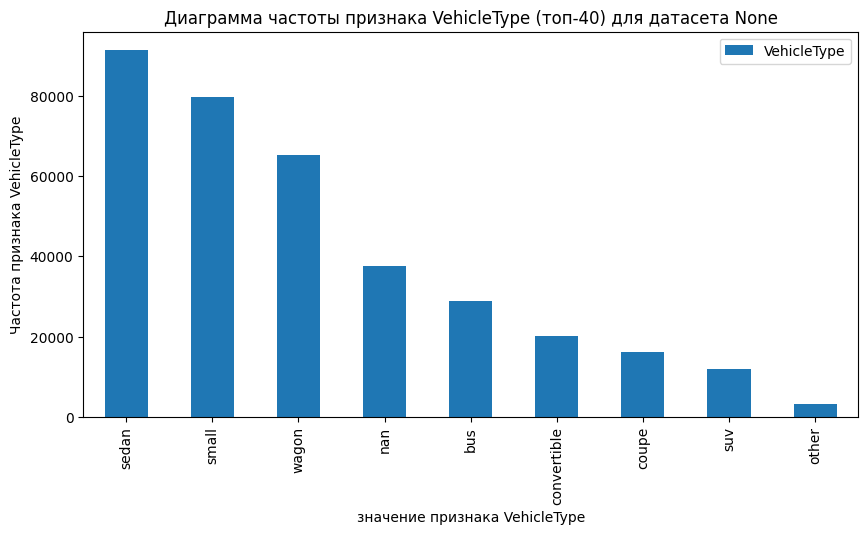

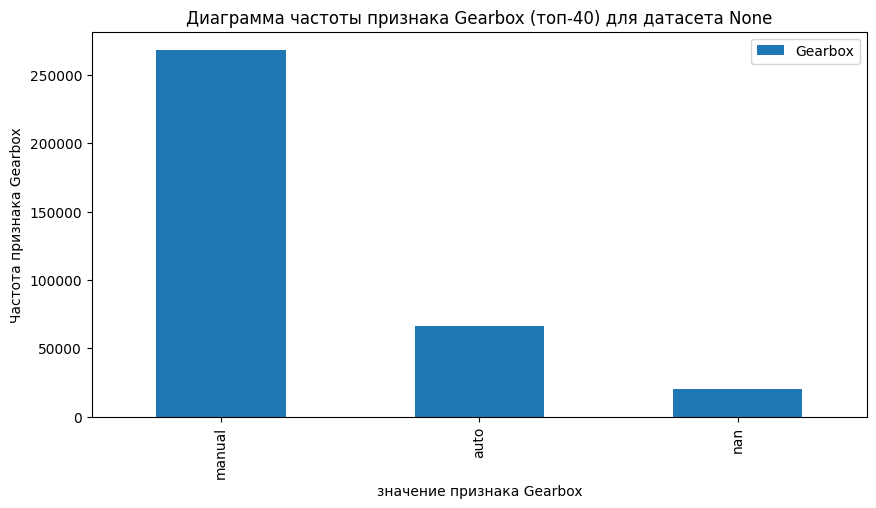

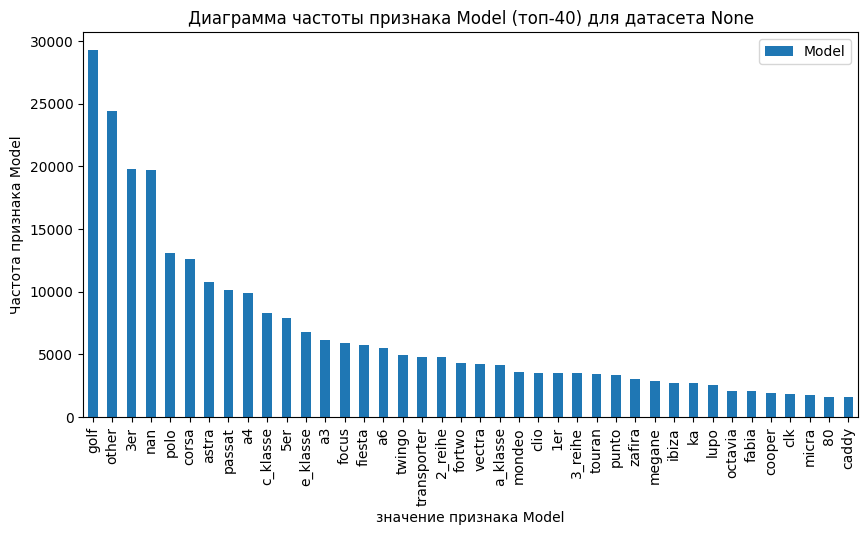

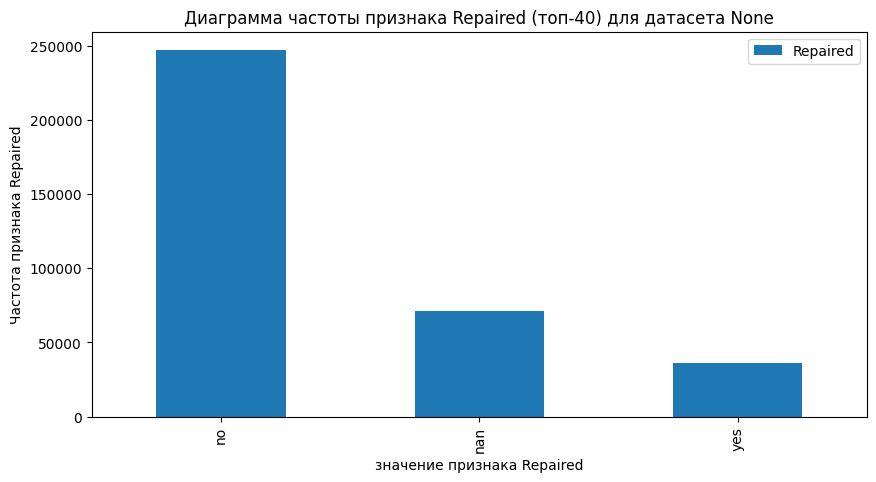

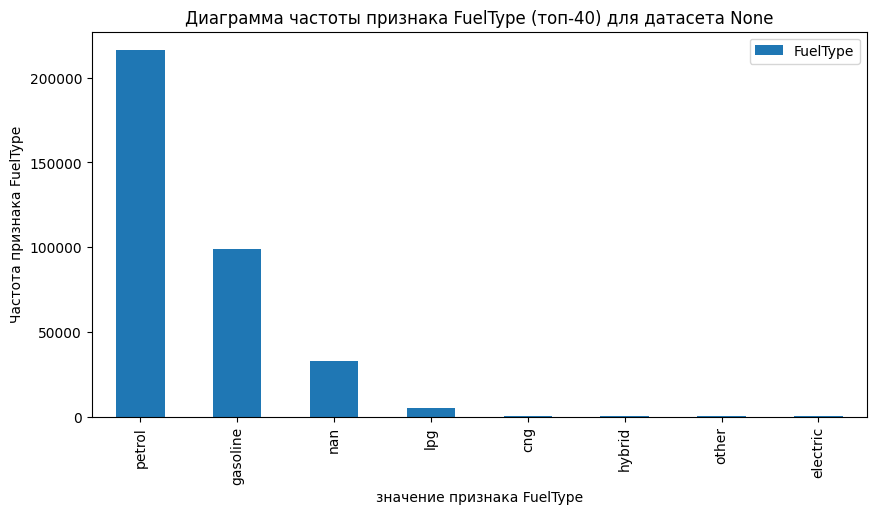

In [15]:
analysis_df(data[['VehicleType', 'Gearbox', 'Model', 'Repaired', 'FuelType']])

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

   
<b>На доработку❌:</b> Для признаков с большим количеством уникальных значений стоит визуализировать топ-n значений, чтобы визуализация была эффективной и помогала принимать решения - в текущем некоторые графики не поддаются чтению.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Поправил
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

Начнем c показателя Тип топлива

1) Судя по информации из открытых источников, Petrol и Gasoline - это один и тот же вид топлива: иначе говоря бензин. Их можно заменить на единое значение - пусть это будет Petrol

2) lpg and cng - два вида газа, которые существенно отличаются. Поэтому их оставим раздельными

3) в целом, колоссальным значением обладают именно бензиновые двигатели по сравнению со всеми остальными(это и понятно)
Заполним пустые значения типа топлива по бренду и модели - чтобы исключить вероятность попадания на электричесмкие или гибридные автомобили

In [16]:
data.loc[data['FuelType'] == 'gasoline', 'FuelType'] = 'petrol'

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Хорошее замечание:)

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 
        
Обрати внимание на `Model` - значения `rangerover` и `range_rover` аналогично характеризуют одну модель, можно также привести к одной форме.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [17]:
data.loc[data.Model == 'rangerover', 'Model'] = 'range_rover'

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b>
Все библиотеки стоит импортировать в начале проекта - таким образом получатель твоего отчёта сможет узнать о проблемах с его окружением сразу перед работой с проектом, а не посреди или в конце проекта.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

поправил
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [18]:
data.groupby(['Brand', 'Model']).agg({'FuelType': lambda x:mode(x.dropna())}).reset_index()

,Brand,Model,FuelType
0,alfa_romeo,145,petrol
1,alfa_romeo,147,petrol
2,alfa_romeo,156,petrol
3,alfa_romeo,159,petrol
4,alfa_romeo,other,petrol
...,...,...,...
292,volvo,v40,petrol
293,volvo,v50,petrol
294,volvo,v60,petrol
295,volvo,v70,petrol


In [19]:
data_1 = data.copy()

data_1 = data_1.merge(data.groupby(['Brand', 'Model'])\
             .agg({'FuelType': lambda x:mode(x.dropna())})\
             .reset_index().rename(columns={'FuelType':"ft_true"}), how='left', on=['Brand', 'Model']
            )

data_1.FuelType.fillna(data_1.ft_true, inplace=True)

Статистический анализ таблицы None


,count,unique,top,freq
FuelType,347202,6,petrol,340800


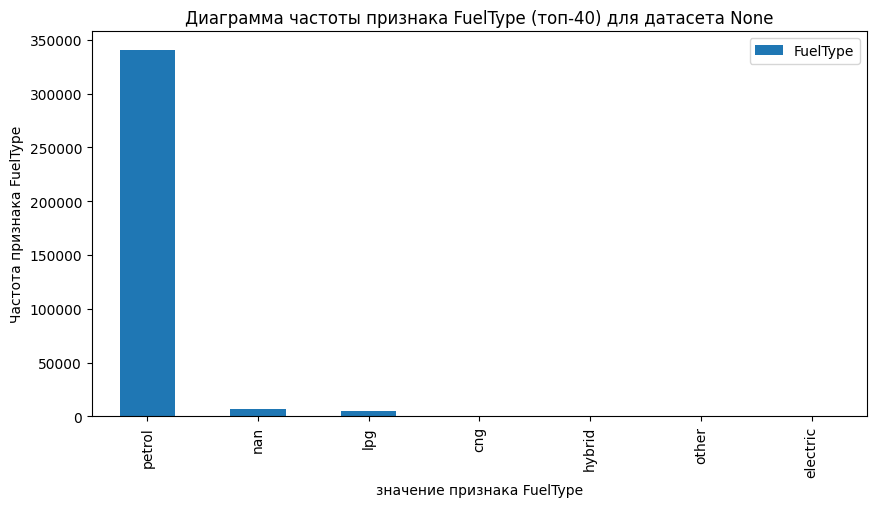

In [20]:
analysis_df(data_1[['FuelType']], dropna=False)

In [21]:
data.FuelType.value_counts(dropna=False)

petrol      315068
NaN          32895
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: FuelType, dtype: int64

In [22]:
data_1.FuelType.value_counts(dropna=False)

petrol      340800
NaN           7163
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: FuelType, dtype: int64

Собственно, никаких значимых изменений нет - все равно все заполняется модой по бензину.
Не вижу причин оставлять оставшиеся 7000 пустых значений - заполним их тоже бензиновыми двигателями

In [23]:
data.FuelType.fillna('petrol', inplace=True)

In [24]:
data.FuelType.isna().sum()

0

Теперь заполним пустоты в информации о ремонте

Наилучшим мне кажется заполнение по пробегу - чем он больше, тем выше вероятность, что машину ремонтировали

In [25]:
fill_values = data.groupby('Kilometer')['Repaired'].transform(lambda x: mode(x.dropna()))

data_1 = data.copy()

data_1['Repaired'] = data_1['Repaired'].fillna(fill_values)

In [26]:
data.Repaired.value_counts(dropna=False)

no     247158
NaN     71154
yes     36053
Name: Repaired, dtype: int64

In [27]:
data_1.Repaired.value_counts(dropna=False)

no     318312
yes     36053
Name: Repaired, dtype: int64

Подавляющая масса машин скорее без ремонта, чем с ремонтом - поэтому заполним все пустые значения 'no'

In [28]:
data.Repaired.fillna('no', inplace= True)

Работаем с признаком Коробка передач: какая именно пропущена - не угадаешь. заполним самым часто встречающимся значением - ручная

In [29]:
data.Gearbox.fillna('manual', inplace=True)

И наконец признак "Модель". Заполнять буду как наиболее часто встречающуюся в Бренде(марке) автомобиля + добавлю мощность машины

In [30]:
temp_df = data.groupby(['Brand', 'Power'])\
        .agg({'Model' : list})\
        .reset_index()\
        .rename(columns={'Model': 'list_of_models'})

temp_df


,Brand,Power,list_of_models
0,alfa_romeo,0,"[147, other, nan, 156, 145, 156, 156, spider, ..."
1,alfa_romeo,50,[other]
2,alfa_romeo,63,[other]
3,alfa_romeo,65,"[other, other]"
4,alfa_romeo,66,[145]
...,...,...,...
5427,volvo,300,"[v70, v70]"
5428,volvo,315,"[xc_reihe, xc_reihe, xc_reihe, xc_reihe, other]"
5429,volvo,1056,[v40]
5430,volvo,1162,[v40]


Создаю функцию для получения наиболее часто встречающегося значения, но с оговоркой, что могут быть пустые массивы и строки - для них замена значений либо на NAN , либо на саму строку

In [31]:

def help_func(var):
    return mode(var)


In [32]:
temp_df['Model_temp'] = temp_df['list_of_models'].apply(help_func)
temp_df

,Brand,Power,list_of_models,Model_temp
0,alfa_romeo,0,"[147, other, nan, 156, 145, 156, 156, spider, ...",156
1,alfa_romeo,50,[other],other
2,alfa_romeo,63,[other],other
3,alfa_romeo,65,"[other, other]",other
4,alfa_romeo,66,[145],145
...,...,...,...,...
5427,volvo,300,"[v70, v70]",v70
5428,volvo,315,"[xc_reihe, xc_reihe, xc_reihe, xc_reihe, other]",xc_reihe
5429,volvo,1056,[v40],v40
5430,volvo,1162,[v40],v40


Заполняем пропущенные данные по модели

In [33]:
data_1 = data.copy()

data_1 = data_1.merge(temp_df.drop('list_of_models', axis=1), how='left', on=['Brand', 'Power'])

data_1['Model'] = data_1['Model'].fillna(data_1.Model_temp)

In [34]:
data_1.shape

(354365, 17)

In [35]:
data.Model.value_counts(dropna=False)

golf                  29232
other                 24420
3er                   19761
NaN                   19705
polo                  13066
                      ...  
serie_2                   8
i3                        8
serie_3                   4
range_rover_evoque        2
serie_1                   2
Name: Model, Length: 250, dtype: int64

In [36]:
data_1.Model.value_counts(dropna=False)

golf                  31582
other                 25805
3er                   21412
polo                  13688
corsa                 13555
                      ...  
serie_2                   8
i3                        8
serie_3                   4
range_rover_evoque        2
serie_1                   2
Name: Model, Length: 250, dtype: int64

In [37]:
data_1.Model.isna().sum()

3693

In [38]:
data_1[data_1.Model.isna()]

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen,Model_temp
59,2016-03-29 15:48:15,1,suv,1994,manual,286,NaN,150000,11,petrol,sonstige_autos,no,2016-03-29,0,53721,2016-04-06 01:44:38,NaN
306,2016-03-21 14:38:37,200,NaN,2009,manual,0,NaN,10000,0,petrol,sonstige_autos,no,2016-03-21,0,6493,2016-03-24 02:47:34,NaN
431,2016-03-20 20:45:27,3950,small,2004,auto,5,NaN,70000,5,petrol,sonstige_autos,no,2016-03-20,0,90562,2016-04-03 04:17:08,NaN
650,2016-03-30 11:55:46,15000,coupe,1971,manual,0,NaN,5000,4,petrol,sonstige_autos,no,2016-03-30,0,51145,2016-04-07 02:45:10,NaN
661,2016-04-01 15:56:27,9900,suv,2000,auto,250,NaN,150000,4,lpg,sonstige_autos,no,2016-04-01,0,17309,2016-04-07 14:56:03,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354058,2016-03-19 11:25:16,6000,small,2008,manual,155,NaN,150000,5,petrol,sonstige_autos,no,2016-03-19,0,63069,2016-04-07 00:46:42,NaN
354069,2016-03-19 14:53:26,1750,NaN,1995,manual,0,NaN,100000,12,petrol,sonstige_autos,no,2016-03-19,0,6188,2016-04-01 01:47:17,NaN
354079,2016-03-30 07:54:17,0,NaN,2000,manual,0,NaN,150000,0,petrol,sonstige_autos,no,2016-03-30,0,6686,2016-04-06 23:46:19,NaN
354317,2016-03-15 13:52:34,9400,wagon,2007,manual,200,NaN,150000,4,petrol,sonstige_autos,yes,2016-03-15,0,91186,2016-03-17 08:16:25,NaN


Больше 16_000 пустых значений заполнили моделями с привязкой к бренду и мощности автомобиля.

Оставшиеся пустые значения - это некие 'sonstige_autos' или Другие автомобили.

Такие пустые значения лучше заполнить заглушкой

In [39]:
data_1['Model'].fillna(-1, inplace=True)

In [40]:
data = data_1[['Price', 'Brand', 'Model', 'Kilometer', 'Power', 'RegistrationYear', 
             'RegistrationMonth', 'Gearbox', 'VehicleType', 'FuelType', 'Repaired',
             'NumberOfPictures', 'PostalCode', 
             'DateCrawled', 'DateCreated',  'LastSeen']].copy()

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Делая копию или срез какой-то таблицы, стоит использовать метод `copy()`: используя простое присвивание вида `a=b`, мы в переменную `a` помещаем не новый и самостоятельный объект в памяти, а всего лишь новую ссылку на объект в памяти, на который ссылается `b`. Как итог, внеся изменения в `a`, ты увидишь их и в `b`, и наоборот. Метод `copy()` позволяет создавать именно новые объекты в памяти.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

👌
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [41]:
data[data.Power>=10000].sort_values('Power', ascending=False)

,Price,Brand,Model,Kilometer,Power,RegistrationYear,RegistrationMonth,Gearbox,VehicleType,FuelType,Repaired,NumberOfPictures,PostalCode,DateCrawled,DateCreated,LastSeen
219583,4300,mercedes_benz,clk,150000,20000,1999,1,auto,coupe,petrol,no,0,19406,2016-03-09 15:43:53,2016-03-09,2016-03-30 08:47:08
299177,1500,bmw,5er,150000,19312,1997,1,manual,wagon,petrol,no,0,21129,2016-03-09 08:53:11,2016-03-09,2016-04-07 11:44:34
114106,9999,bmw,1er,125000,19211,2006,0,manual,sedan,petrol,no,0,45964,2016-04-03 07:36:21,2016-04-03,2016-04-07 10:16:10
132485,2100,bmw,5er,150000,19208,2001,5,manual,wagon,petrol,yes,0,59556,2016-03-25 14:55:49,2016-03-25,2016-03-30 05:16:18
63986,3250,opel,omega,150000,17932,2001,6,auto,sedan,petrol,no,0,86641,2016-03-28 11:49:56,2016-03-28,2016-04-06 14:17:21
196531,6000,bmw,5er,150000,17700,2004,7,auto,wagon,petrol,no,0,26316,2016-03-20 16:51:48,2016-03-20,2016-04-06 22:45:56
150676,1700,audi,80,5000,17410,1995,0,manual,wagon,petrol,yes,0,23562,2016-03-09 18:57:50,2016-03-09,2016-03-15 07:17:06
187329,1749,bmw,3er,5000,17019,1989,12,manual,wagon,petrol,no,0,89542,2016-03-17 19:50:23,2016-03-17,2016-03-26 00:46:59
175421,10900,audi,a3,5000,17011,2007,7,auto,sedan,petrol,no,0,12355,2016-03-19 11:38:23,2016-03-19,2016-03-21 15:20:06
216992,11950,audi,a4,20000,16312,2008,4,manual,convertible,petrol,no,0,51647,2016-03-10 08:57:25,2016-03-10,2016-03-17 09:16:19


In [42]:
data.isna().sum()

Price                    0
Brand                    0
Model                    0
Kilometer                0
Power                    0
RegistrationYear         0
RegistrationMonth        0
Gearbox                  0
VehicleType          37490
FuelType                 0
Repaired                 0
NumberOfPictures         0
PostalCode               0
DateCrawled              0
DateCreated              0
LastSeen                 0
dtype: int64

Заполняем пропуски в типе автомобильного кузова - по модели автомобиля

In [43]:
fill_values = data.groupby(['Model'])['VehicleType'].transform(lambda x: mode(x.dropna()))

data_1 = data.copy()

data_1['VehicleType'] = data_1['VehicleType'].fillna(fill_values)

In [44]:
data.VehicleType.value_counts(dropna=False)

sedan          91457
small          79830
wagon          65165
NaN            37490
bus            28775
convertible    20203
coupe          16161
suv            11996
other           3288
Name: VehicleType, dtype: int64

In [45]:
data_1.VehicleType.value_counts(dropna=False)

sedan          109961
small           90444
wagon           69121
bus             32007
convertible     20471
coupe           16565
suv             12506
other            3290
Name: VehicleType, dtype: int64

In [46]:
data = data_1.copy()

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> Аналогично про `copy`.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

Посмотрим на результат заполнения пустот

In [47]:
data.isna().sum()

Price                0
Brand                0
Model                0
Kilometer            0
Power                0
RegistrationYear     0
RegistrationMonth    0
Gearbox              0
VehicleType          0
FuelType             0
Repaired             0
NumberOfPictures     0
PostalCode           0
DateCrawled          0
DateCreated          0
LastSeen             0
dtype: int64

Дропнем оставшиеся пустые значения

In [48]:
data.dropna(inplace=True)

In [49]:
data.isna().sum()

Price                0
Brand                0
Model                0
Kilometer            0
Power                0
RegistrationYear     0
RegistrationMonth    0
Gearbox              0
VehicleType          0
FuelType             0
Repaired             0
NumberOfPictures     0
PostalCode           0
DateCrawled          0
DateCreated          0
LastSeen             0
dtype: int64

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354365 entries, 0 to 354364
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Price              354365 non-null  int64         
 1   Brand              354365 non-null  object        
 2   Model              354365 non-null  object        
 3   Kilometer          354365 non-null  int64         
 4   Power              354365 non-null  int64         
 5   RegistrationYear   354365 non-null  int64         
 6   RegistrationMonth  354365 non-null  int64         
 7   Gearbox            354365 non-null  object        
 8   VehicleType        354365 non-null  object        
 9   FuelType           354365 non-null  object        
 10  Repaired           354365 non-null  object        
 11  NumberOfPictures   354365 non-null  int64         
 12  PostalCode         354365 non-null  int64         
 13  DateCrawled        354365 non-null  datetime

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

В целом любая импутация пропусков сопряжена с риском внесения в модель ошибок, а удаление - с потерей обучающих примеров. При этом в случае удаления мы теряем часть бизнес-сценариев, так как ситуации, когда клиент не указывает какие-то параметры автомобиля - нередкость, и в идеале модель должна уметь обрабатывать и их.
        
При работе с категориальными признаками стоит использовать заглушки в виде новых значений категорий для заполнения пропусков: это позволит как сохранить наблюдения вместо их удаления, так и избавит нас от возможных ошибок при эмпирическом импутировании.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

да, я поставил заглушку на моделях машин со странным брендом)
</div>

### 1.3 Исследовательский анализ данных

Статистический анализ таблицы None


,count,mean,std,min,25%,50%,75%,max
Price,354365.0,4416.679830,4514.176349,0.0,1050.0,2700.0,6400.0,20000.0
Kilometer,354365.0,128211.363989,37905.083858,5000.0,125000.0,150000.0,150000.0,150000.0
Power,354365.0,110.093816,189.851330,0.0,69.0,105.0,143.0,20000.0
RegistrationYear,354365.0,2004.234481,90.228466,1000.0,1999.0,2003.0,2008.0,9999.0
RegistrationMonth,354365.0,5.714650,3.726432,0.0,3.0,6.0,9.0,12.0
NumberOfPictures,354365.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
PostalCode,354365.0,50508.503800,25783.100078,1067.0,30165.0,49413.0,71083.0,99998.0


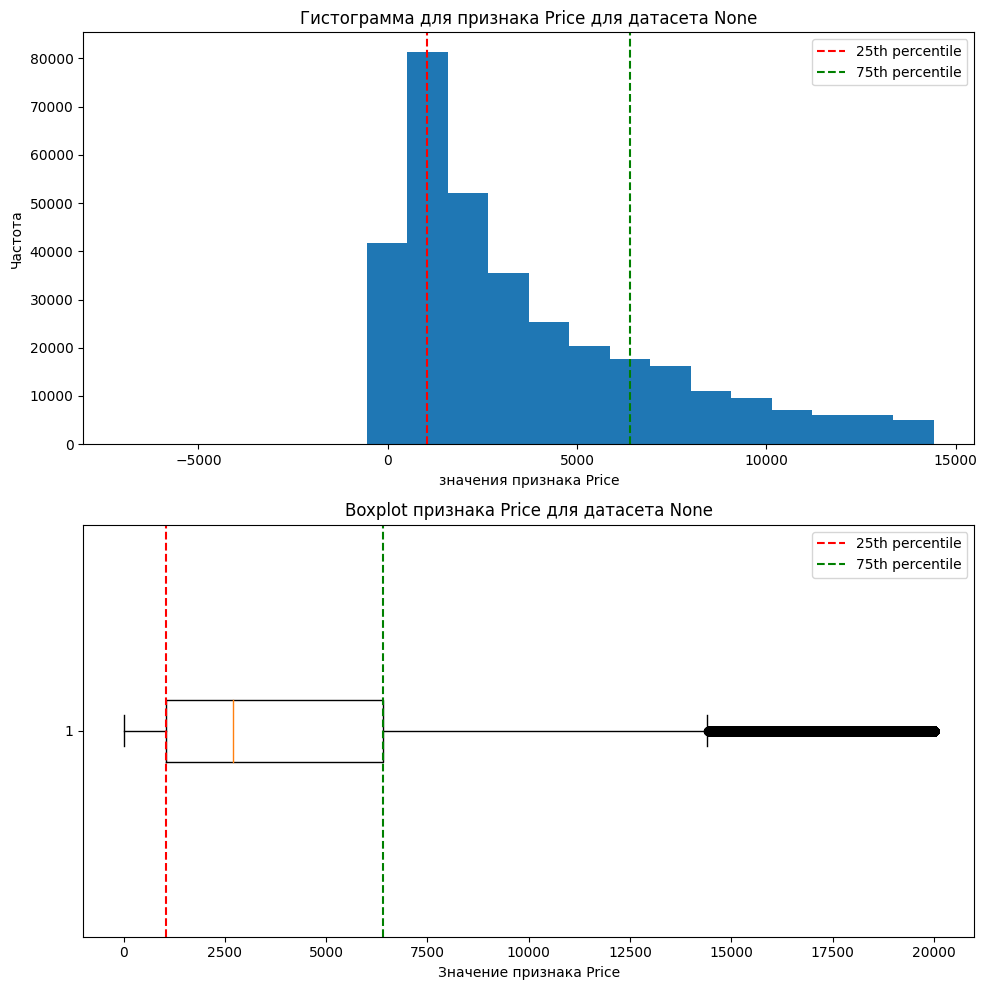

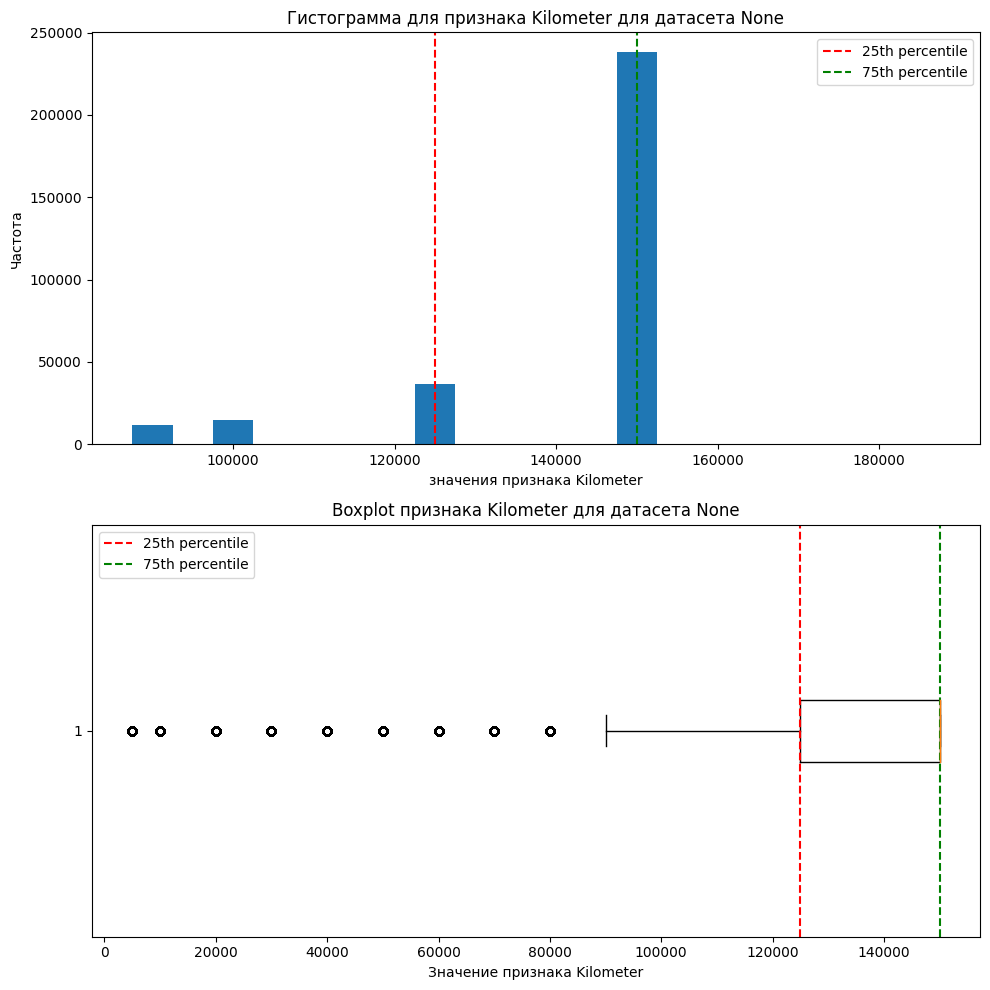

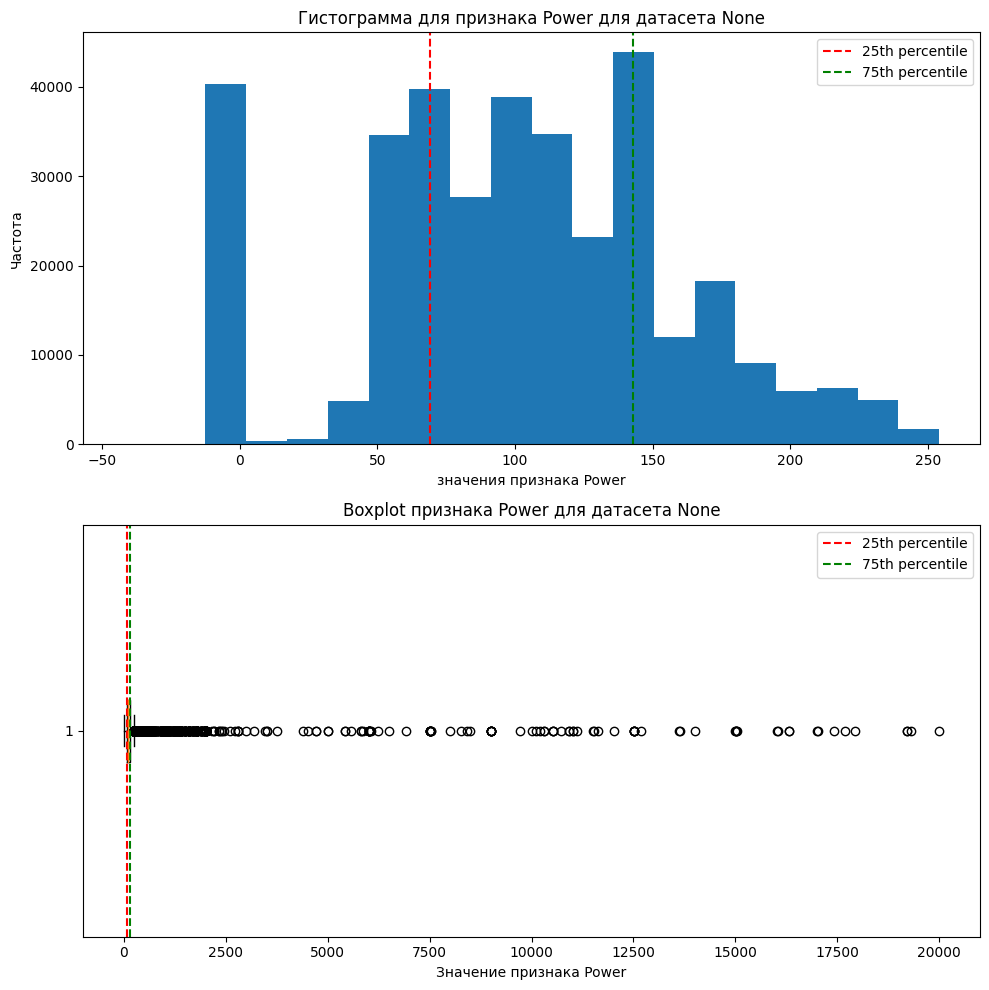

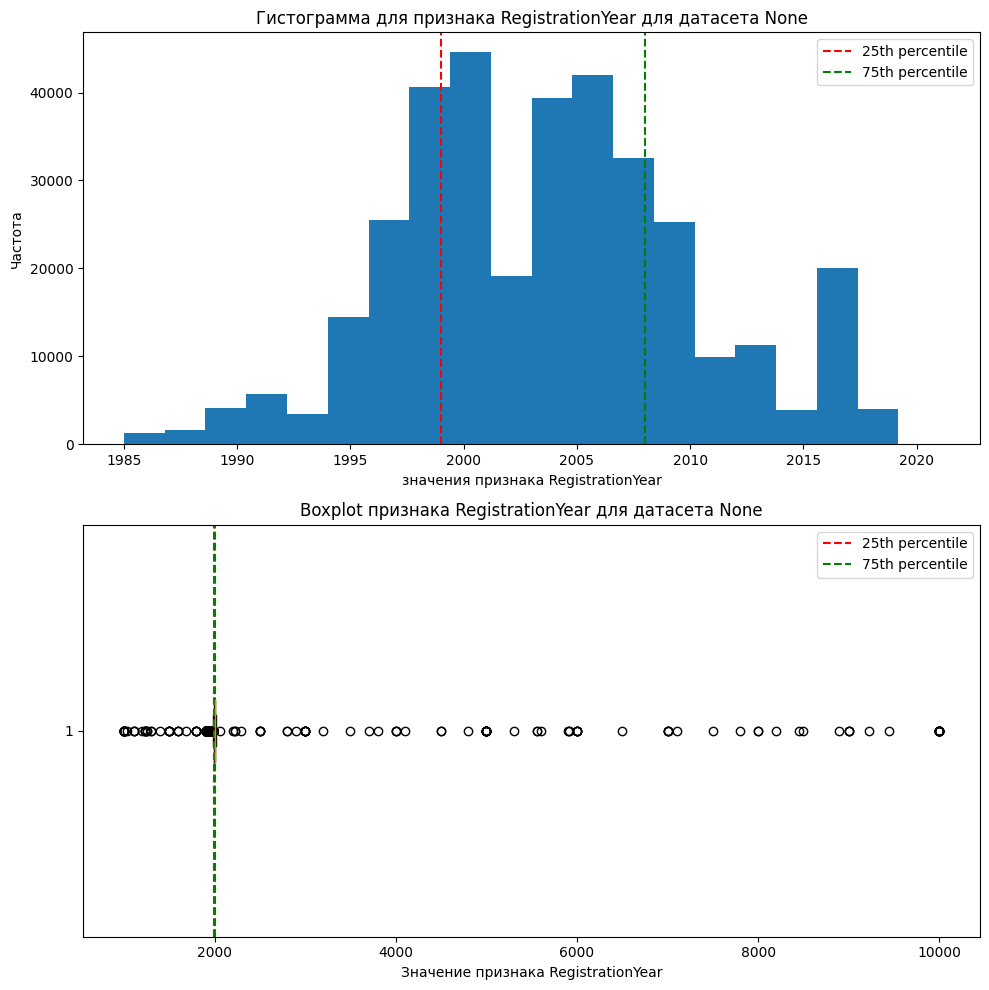

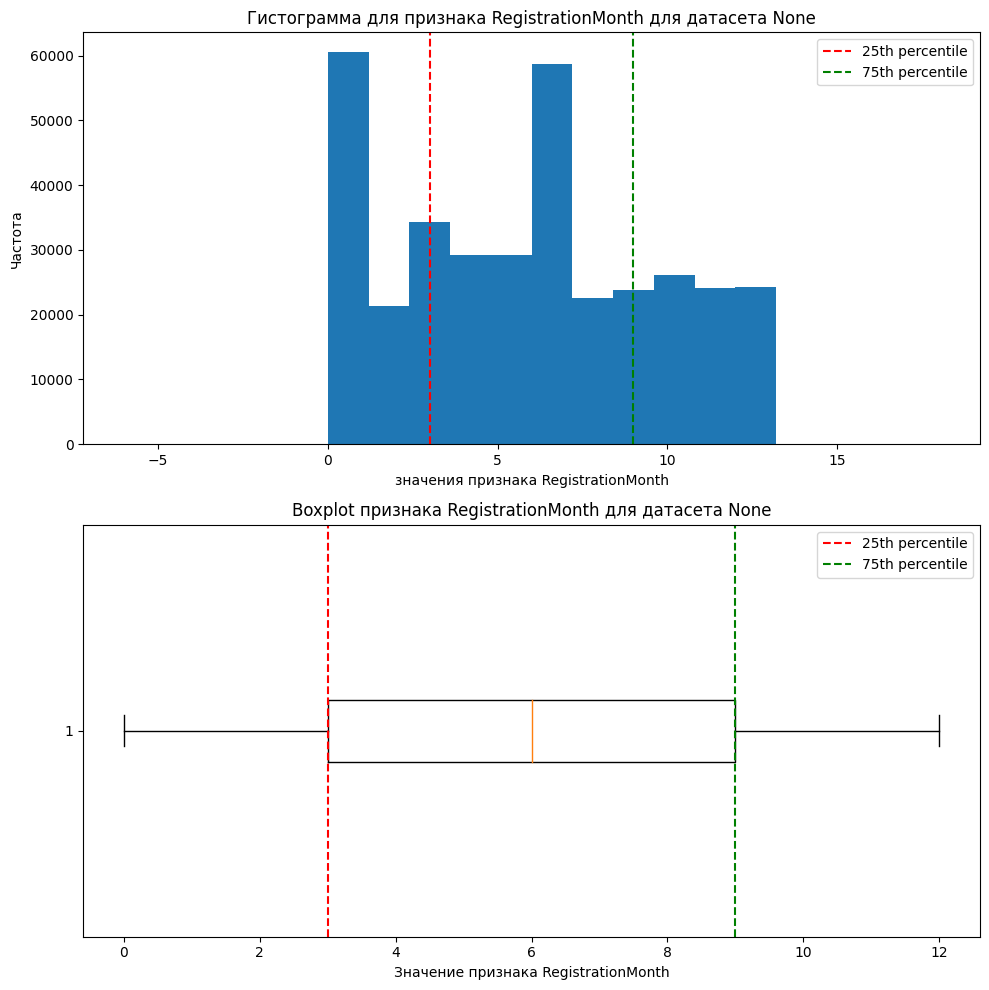

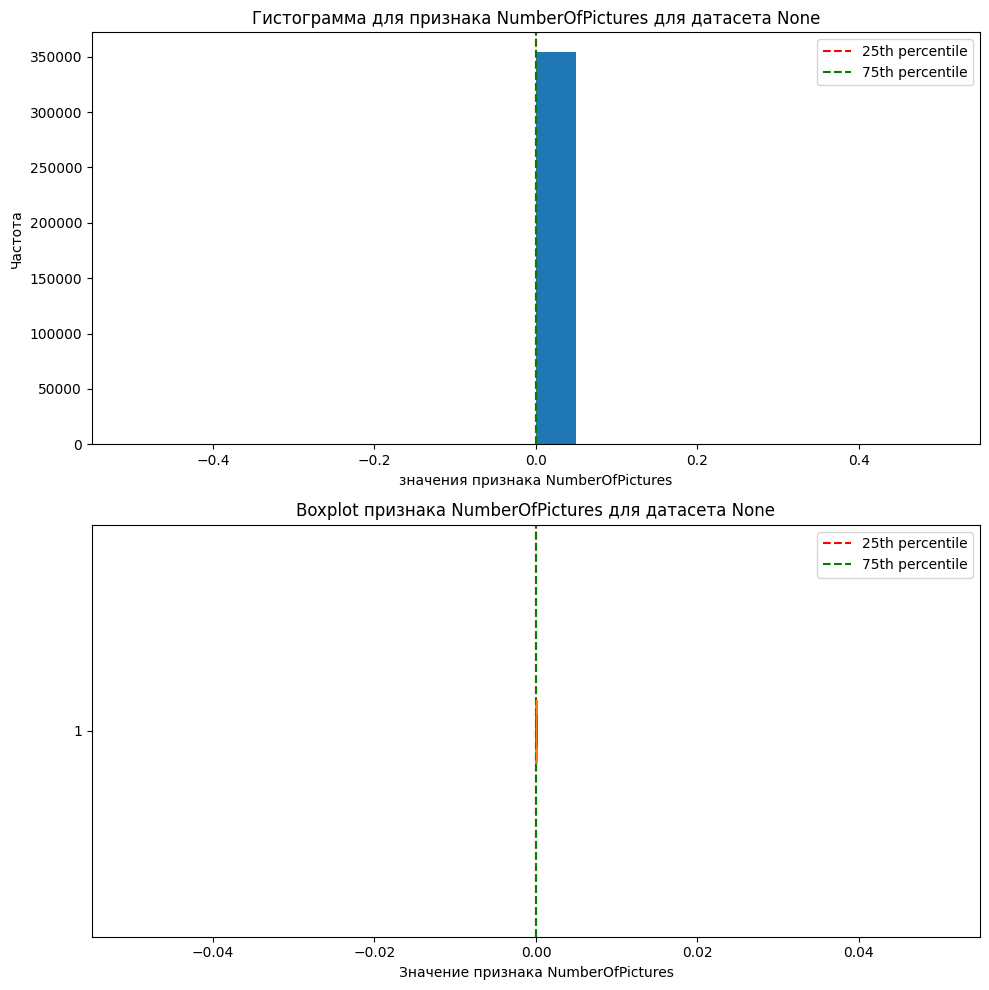

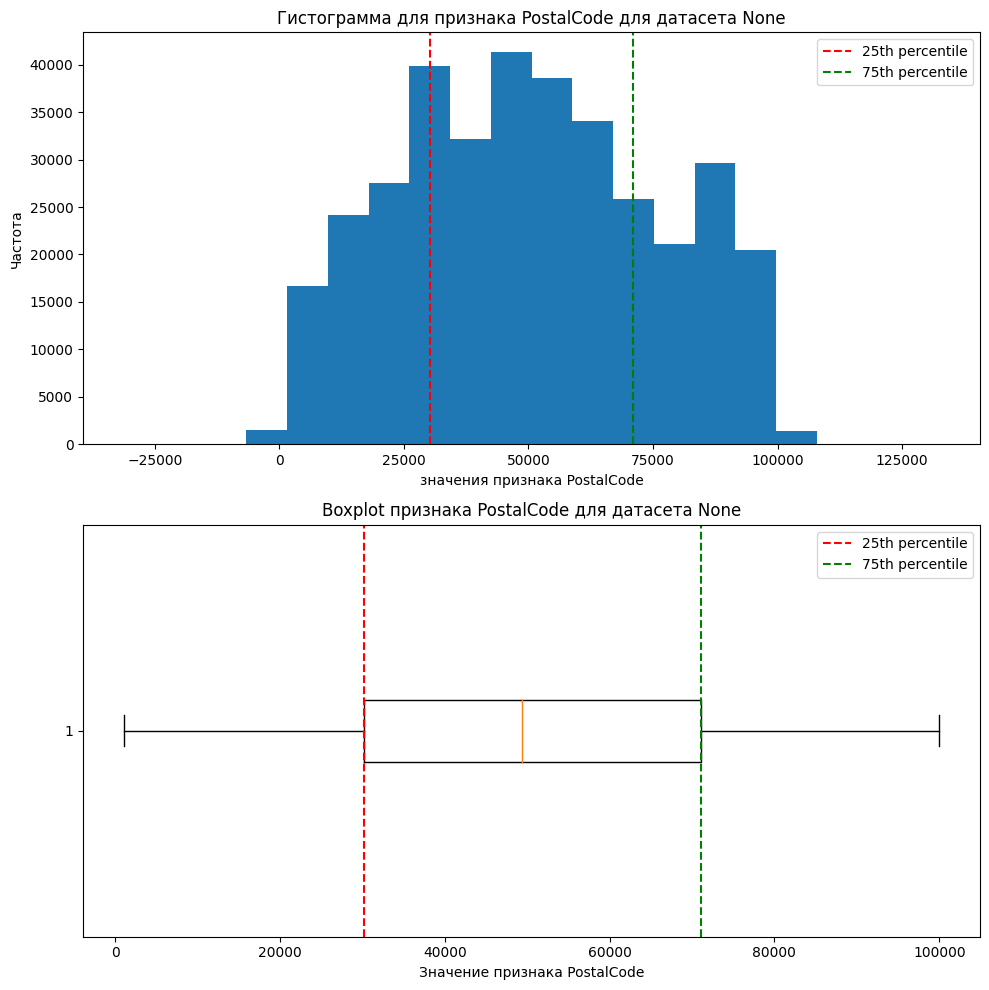

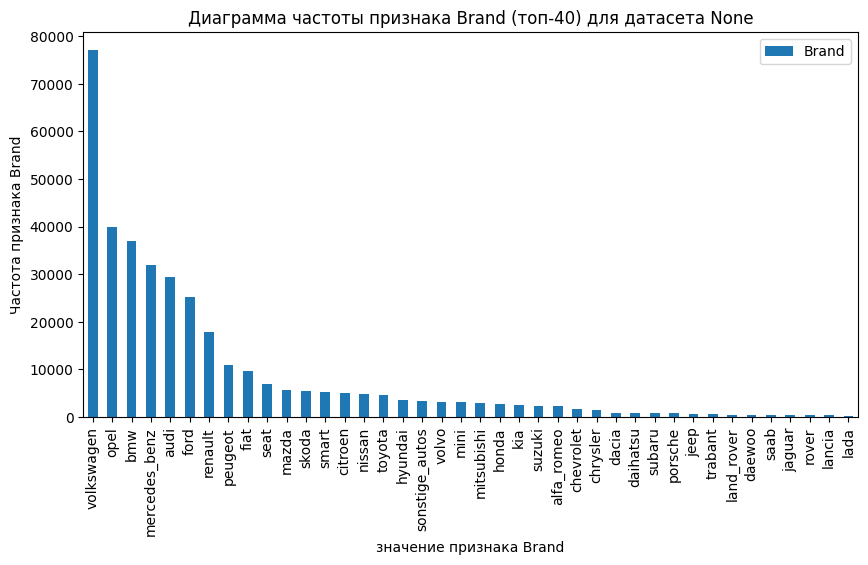

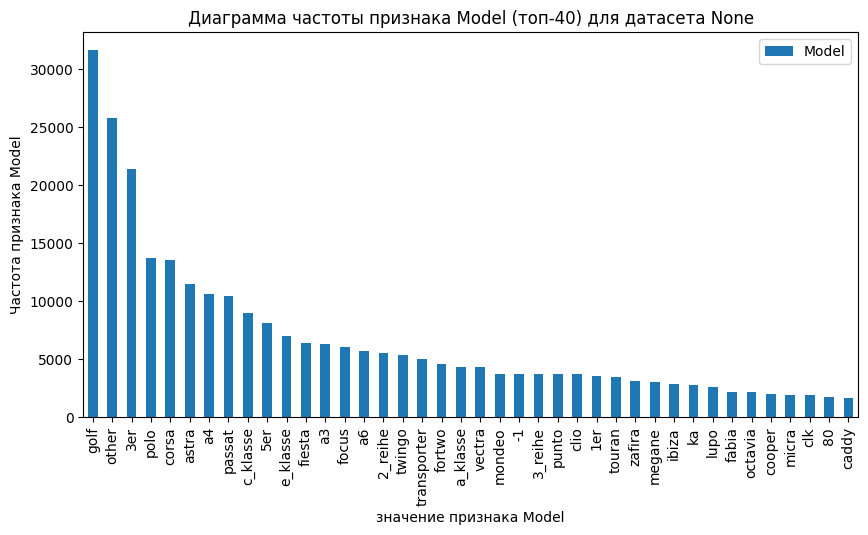

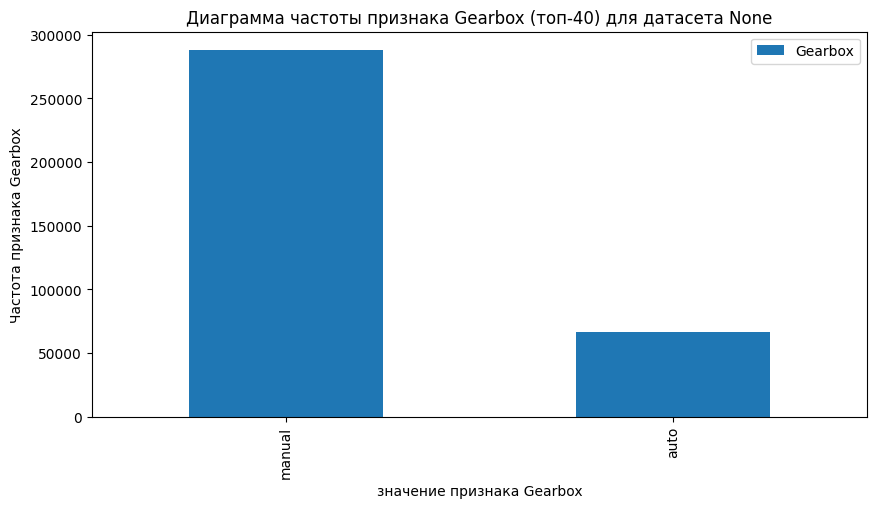

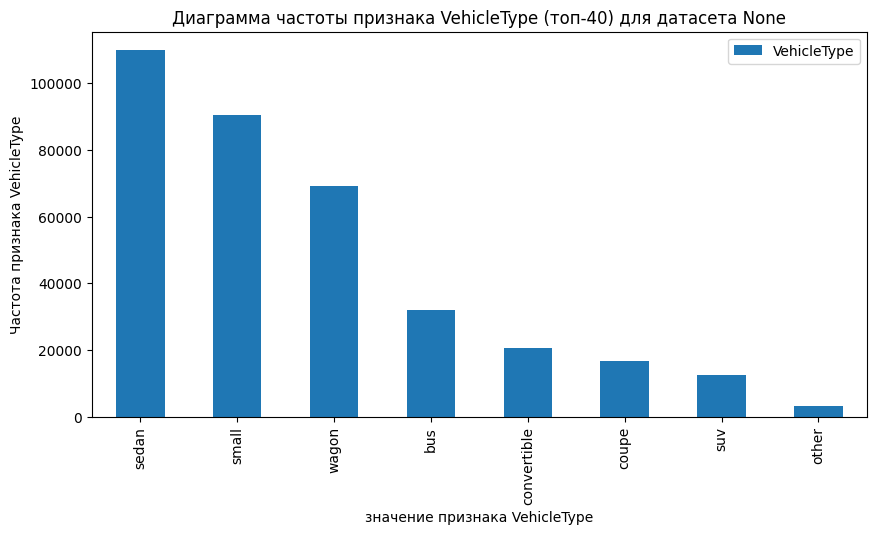

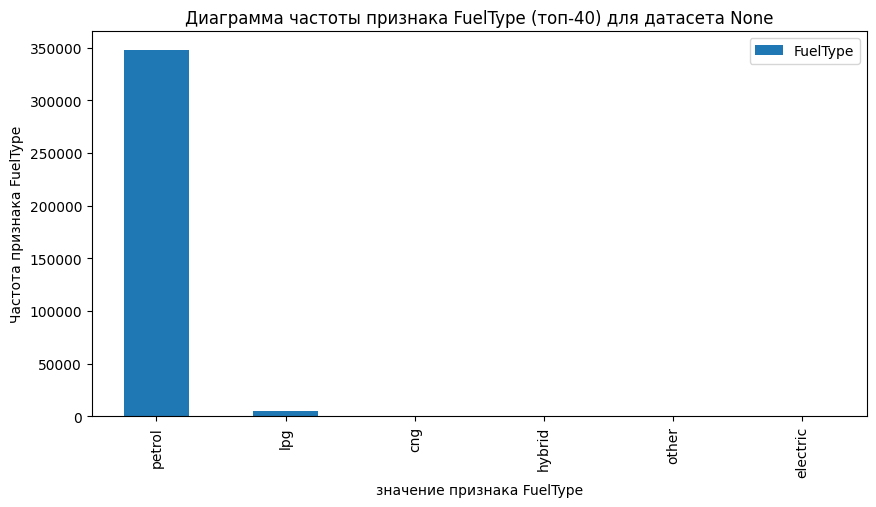

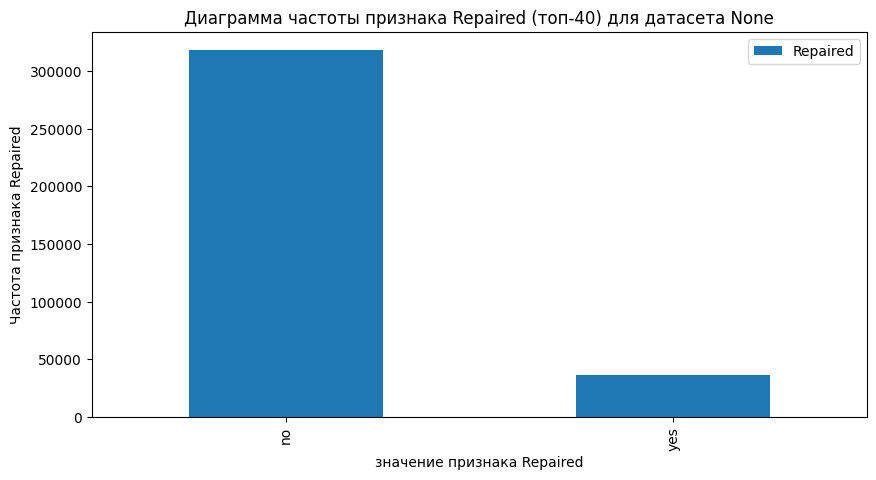

In [51]:
analysis_df(data.drop(['DateCrawled', 'DateCreated',
       'LastSeen'], axis=1), dropna=False)

Большая часть машин - это неремонтированные седаны марки VW с бензиновым двигателем , ручной коробкой передач.

Теперь пройдемся по остальным признакам

In [52]:
data.NumberOfPictures.unique()

array([0])

#### 1.3.1 Число фотографий - бесполезный. Удаляем

In [53]:
data.drop('NumberOfPictures', axis=1, inplace=True)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Верно, признак лишний.

#### 1.3.2 Целевой признак - цена

In [54]:
#создадим функцию для концов усов боксплота
def print_bp(data, col_name):
    q25, q75 = data[col_name].quantile(0.25), data[col_name].quantile(0.75)
    min_val = int(q25- 1.5*(q75-q25))
    max_val= int(q75 +  1.5*(q75-q25))

    return f'Левый ус {min_val}, правый ус {max_val}'

In [55]:
print_bp(data, 'Price')

'Левый ус -6975, правый ус 14425'

Итак, у цены много выбросов - все, что дороже 14500 евро.

Но значение цены не выходит за границы 20_000 евро. Значит, ошибок нет - это небольшой сегмент дорогих машин. 

Пренебрегать этими данными нельзя.

А вот цены меньше 100 евро удалим, чтобы они не заставляли модель ошибаться

In [56]:
data= data.query('Price> 99').copy()

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Удалены околонулевые значения цены.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Может быть полезно также удалить неадекватно низкие значения цен: в пределах цен до 500-1000 евро вряд ли можно купить полноценный автомобиль.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

#### 1.3.3 Пробег

вообще правильнее отразить в форме столбчатой диаграммы

/var/folders/z1/4rql38_j5pn307f2mn6mrnbw0000gn/T/ipykernel_42486/778726913.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  dataset[col].value_counts(dropna=dropna)[:top_val]\


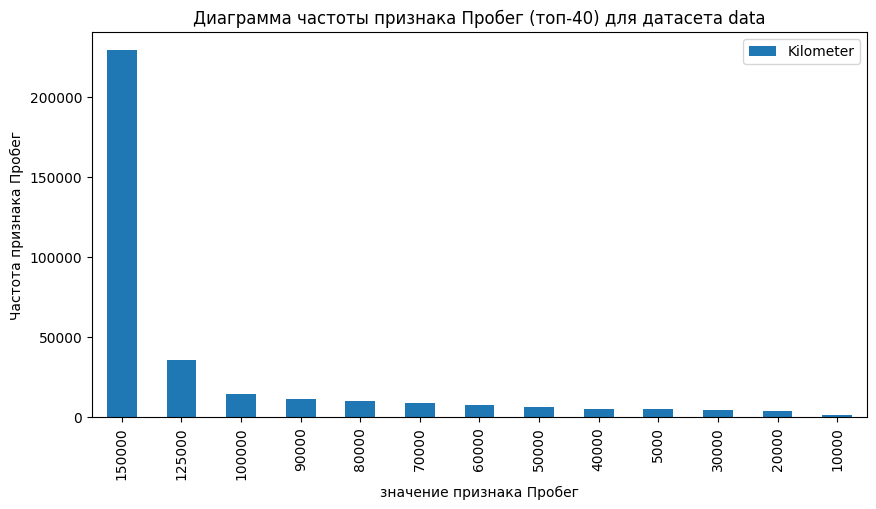

In [57]:
barplot_df(data, 'Kilometer', 'Пробег','data')

Большая часть машин продается с пробегом 150_000 км и более, далее до 125_000 км. Остальных примерно поровну

#### 1.3.4 Мощность

По мощности явно есть проблемы - основная масса лежит в диапазоне от 0 до 250 л.с

Но есть большое число выбросов - например, с мощностью, измеряемой в тысячах лс (явная опечатка):
- больше 1000 будем укорачивать на порядок
- больше 10_000 - на два порядка

Околонулевые значения - удалим

In [58]:
data = data[data.Power > 20].copy()

In [59]:
print_bp(data, 'Power')

'Левый ус -37, правый ус 262'

In [60]:
def make_power_true(pow):
    if 400<pow<3_000: return int(pow/10)
    elif pow>=3_000: return int(pow/100)
    else: return pow

In [61]:
data.Power = data.Power.apply(make_power_true)

Статистический анализ таблицы None


,count,mean,std,min,25%,50%,75%,max
Power,305577.0,119.955612,52.433994,21.0,75.0,110.0,150.0,400.0


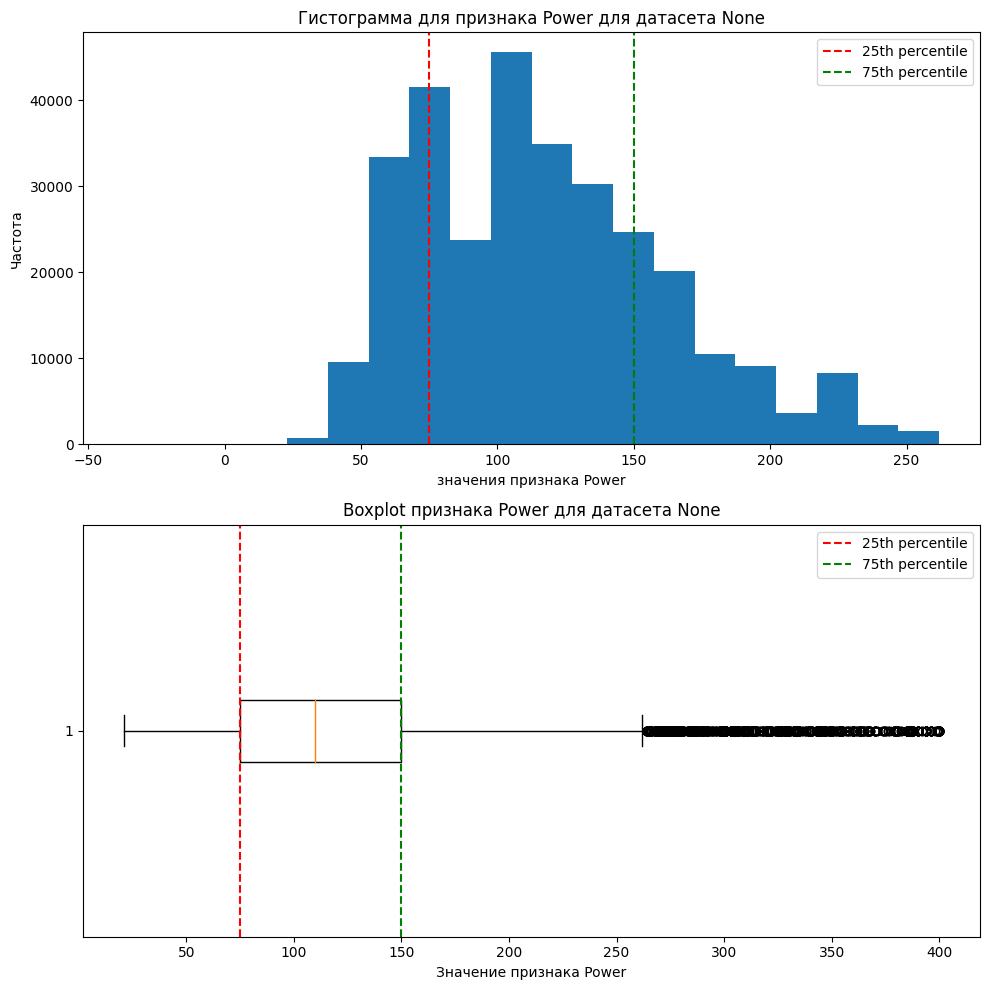

In [62]:
analysis_df(data[['Power']])

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Обработаны аномалии в мощности.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Может быть полезно также удалить околонулевые значения мощности - некоторые значения этого признака в таблице напоминают, скорее, телегу с конём, чем автомобиль:)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Обязательно нужно удалить нулевые значения мощности.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

поправил выше, убрал транспорт по типу Хонда "Ходисам")))
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Отличная машина 😁

Остальные машины считаем мощными

#### 1.3.5 Год регистрации

есть явные проблемы с годом регистрации автомобиля дальше, чем дата создания анкеты - этого не может быть



In [63]:
data.DateCreated.dt.year.max()

2016

Нижнюю границу по году регистрации выберем из здравого смысла - оставим 1970 год.

Все остальное - отсечем

In [64]:
filtered_data = data.query('1970 < RegistrationYear < 2016')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> По году регистрации фильтрация корректна.

In [65]:
filtered_data.shape

(288220, 15)

In [66]:
print(f'Отфильтровали {int((1- filtered_data.shape[0]/data.shape[0]) * 100)}% данных ')

Отфильтровали 5% данных 


#### 1.3.6. Еще раз взглянем на признаки в данных после работы с ними

Статистический анализ таблицы None


,count,mean,std,min,25%,50%,75%,max
Price,288220.0,4911.549636,4614.265704,100.0,1399.0,3250.0,7000.0,20000.0
Kilometer,288220.0,128344.008049,36562.904429,5000.0,125000.0,150000.0,150000.0,150000.0
Power,288220.0,120.811602,52.509572,21.0,77.0,113.0,150.0,400.0
RegistrationYear,288220.0,2002.659309,5.931116,1971.0,1999.0,2003.0,2007.0,2015.0
RegistrationMonth,288220.0,6.024148,3.571044,0.0,3.0,6.0,9.0,12.0
PostalCode,288220.0,51298.250555,25774.911559,1067.0,30966.0,50354.0,72119.0,99998.0


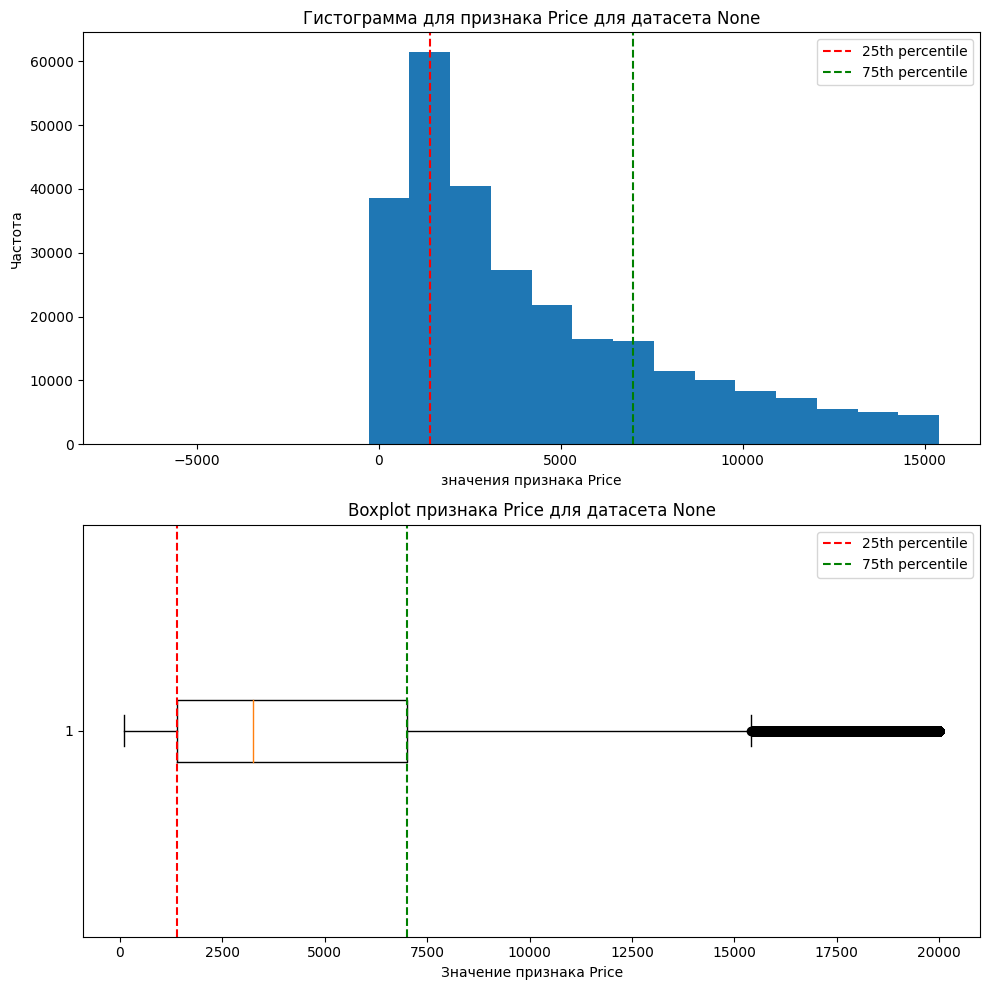

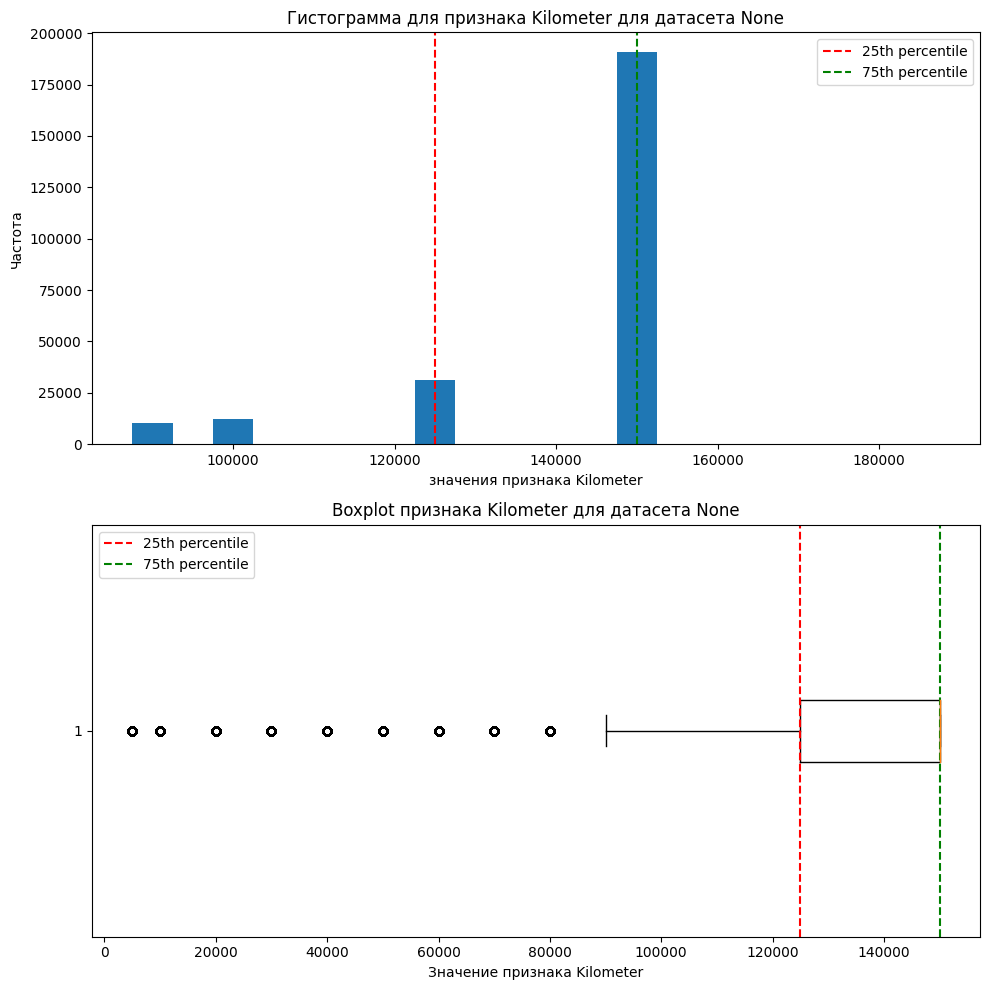

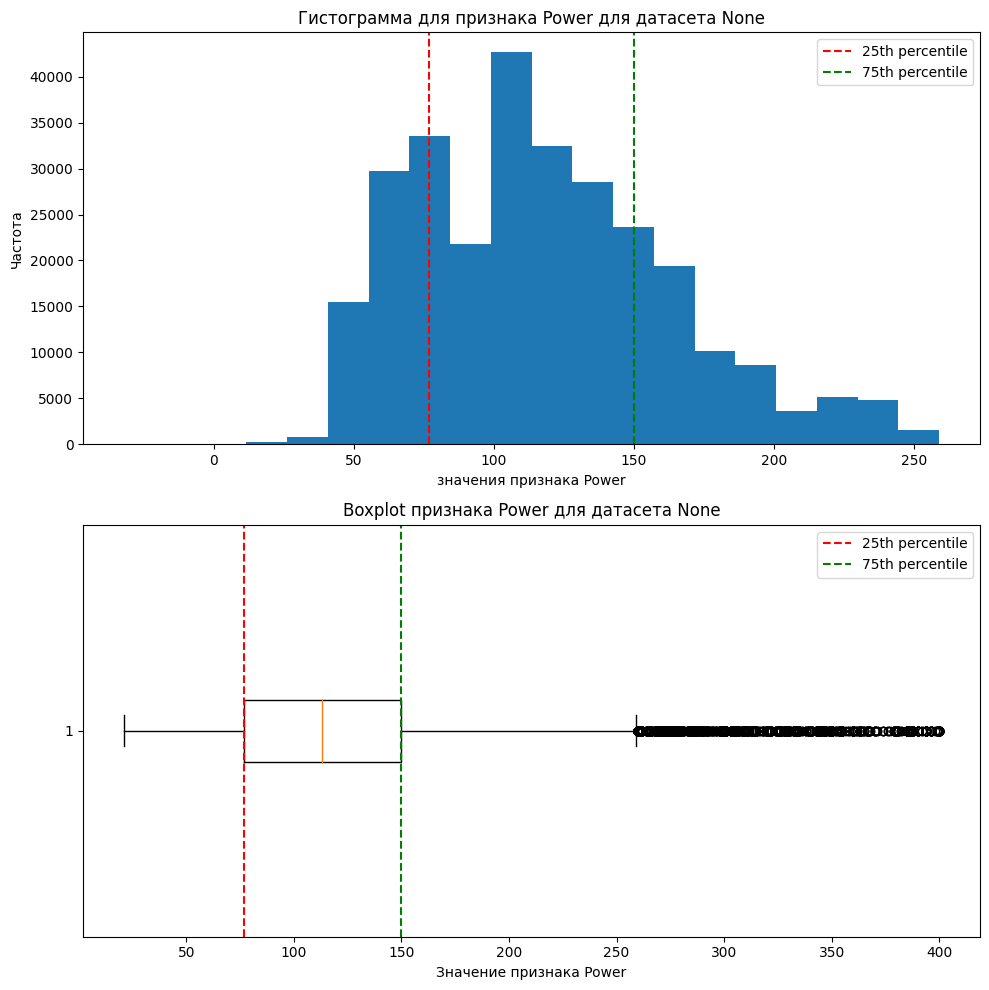

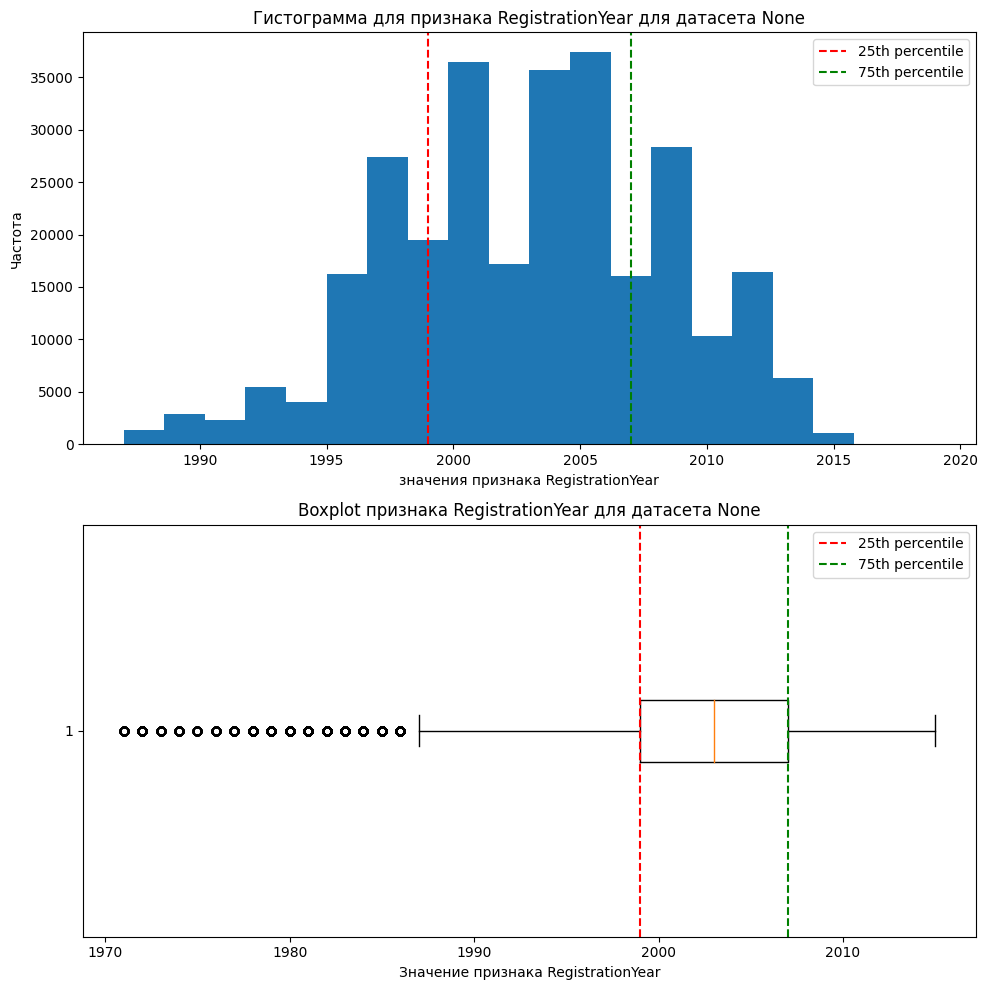

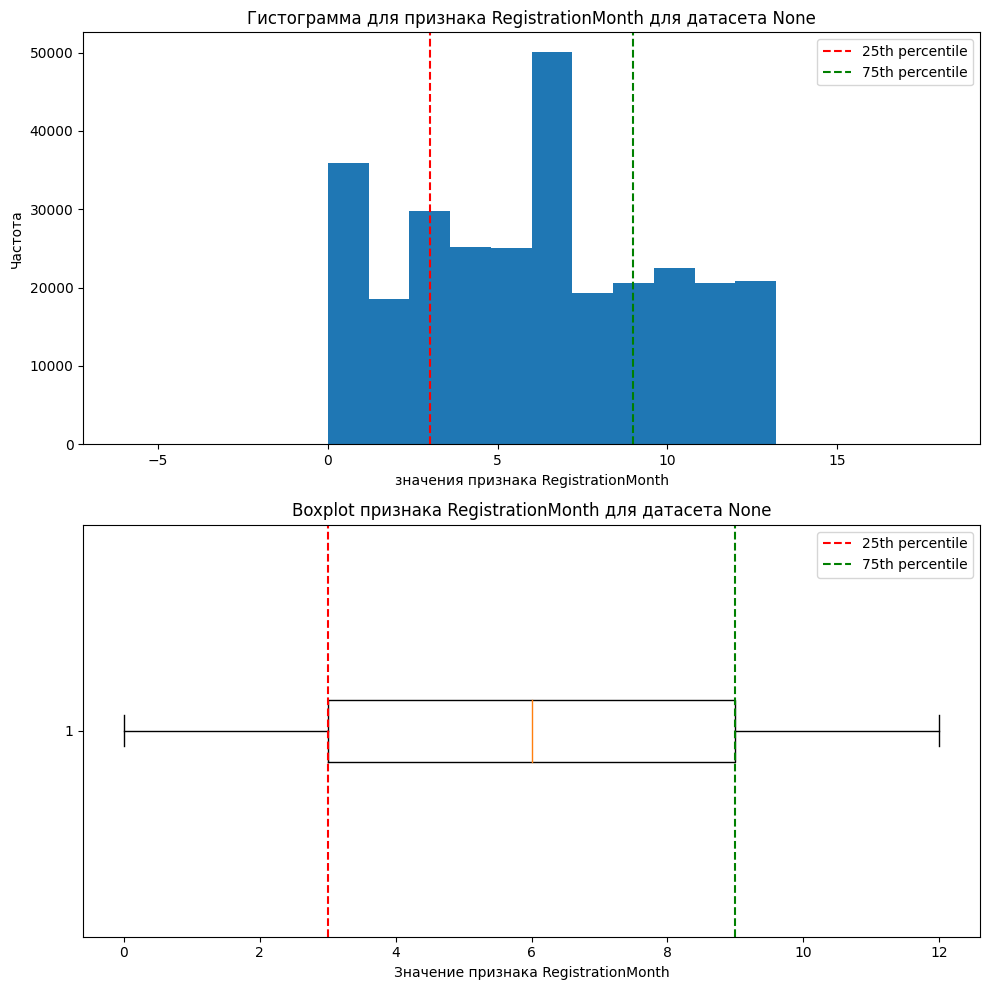

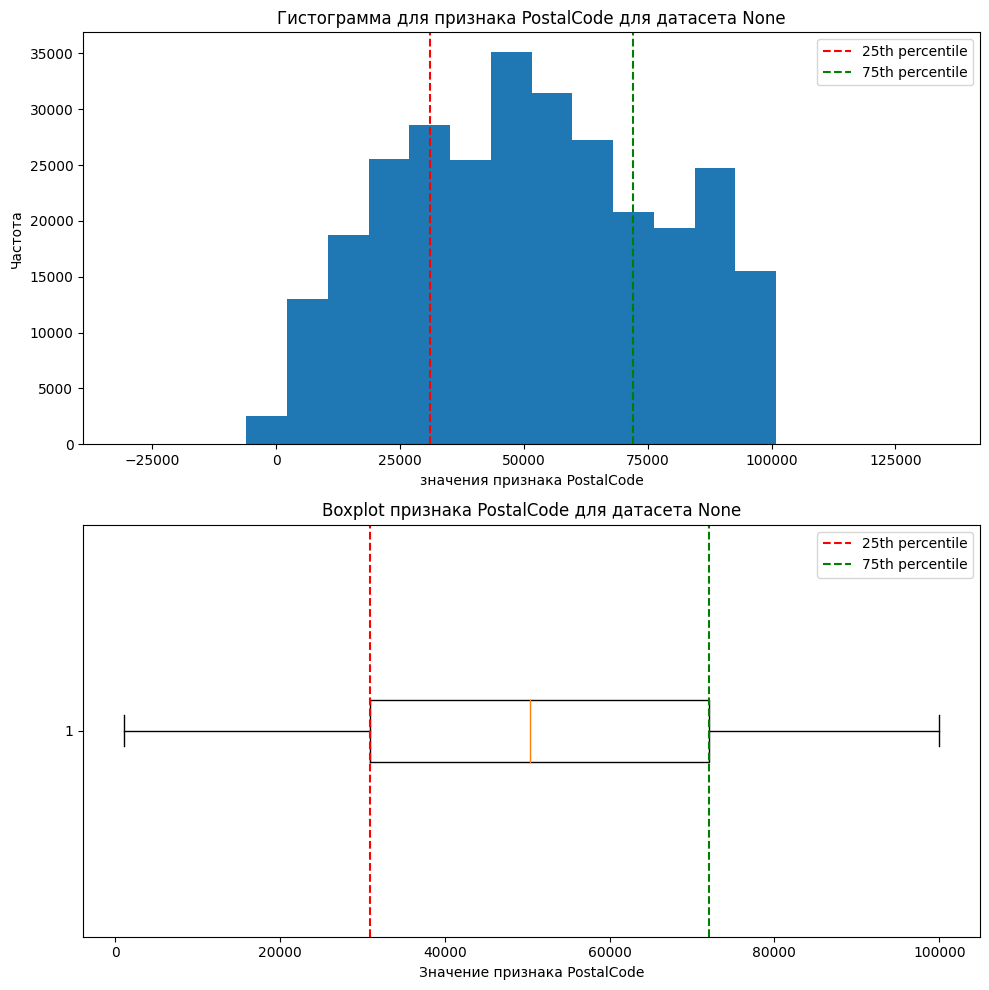

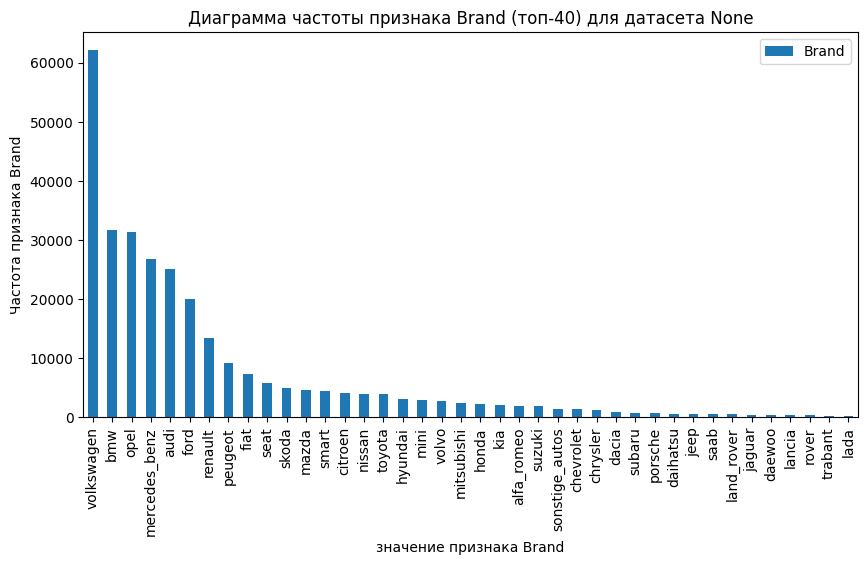

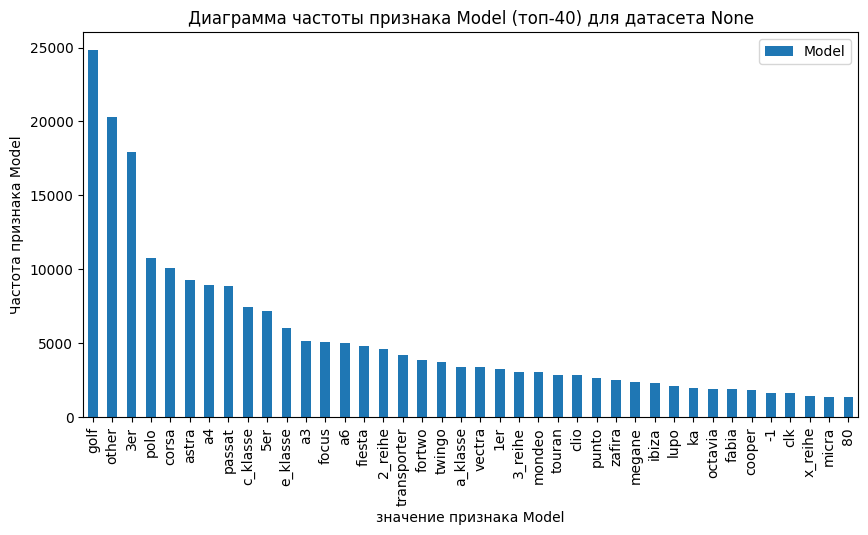

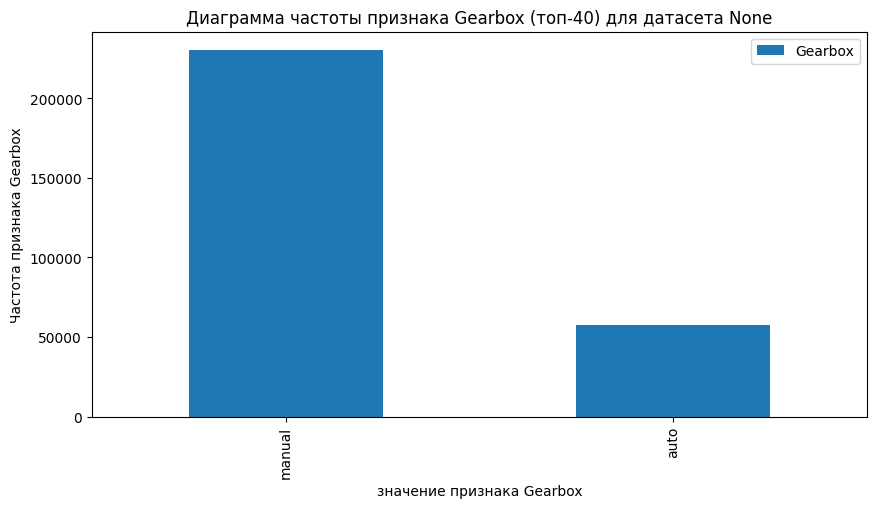

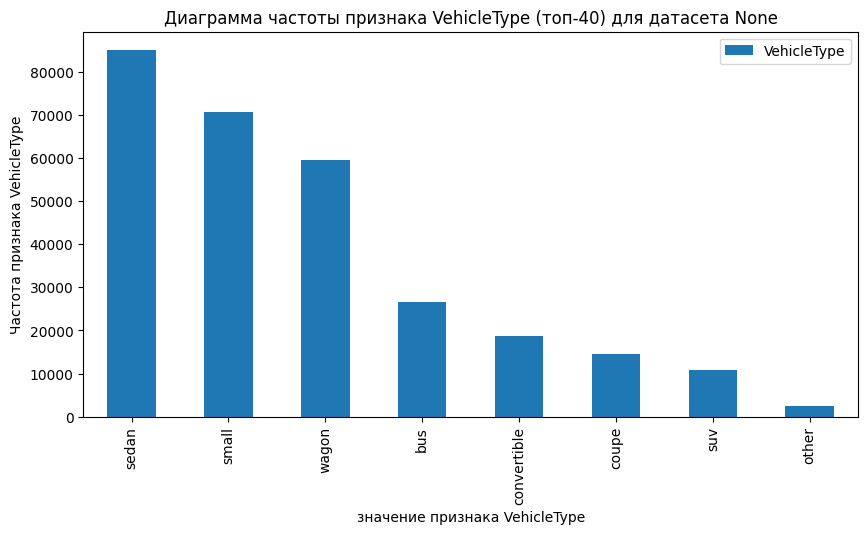

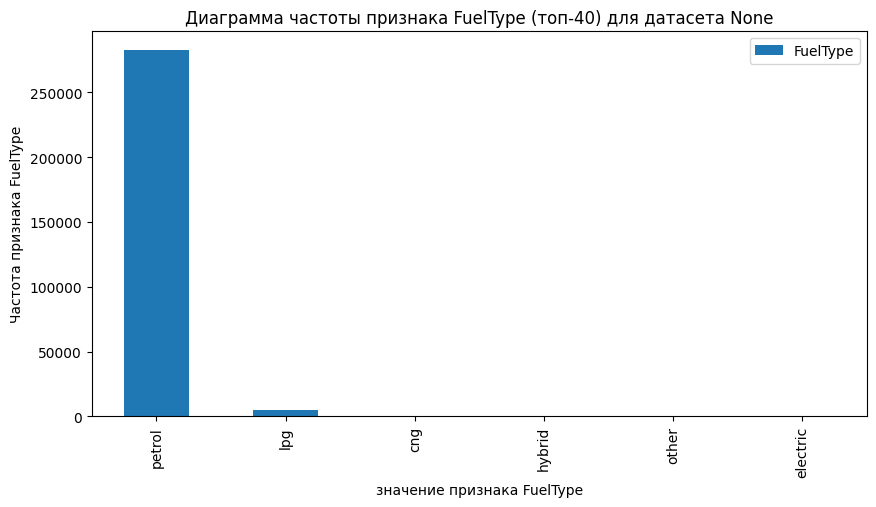

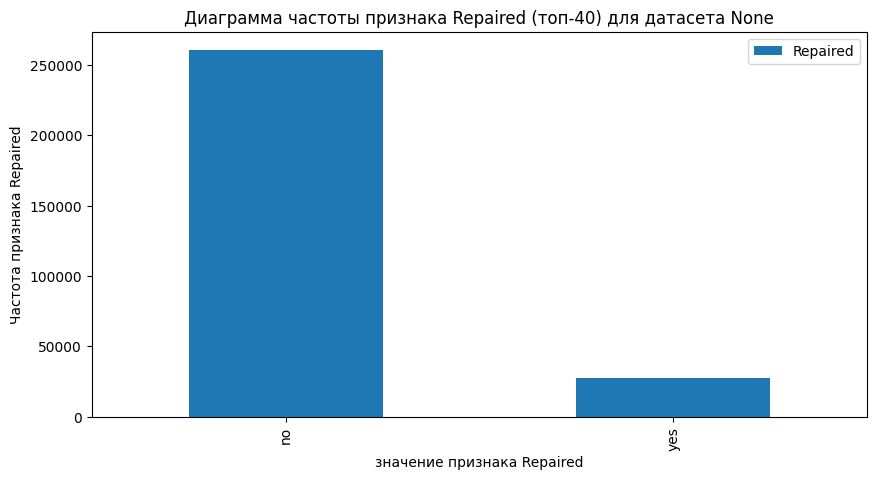

In [67]:
analysis_df(filtered_data.drop(['DateCrawled', 'DateCreated', 'LastSeen'], axis=1))

### 1.4 Исключение ненужных столбцов

- мы уже убрали неинформативный столбец с фотографиями машины (признак был бы интересен, но в данных все заполнено нулями)

- теперь избавимся от столбцов с датами - никакой из этих признаков не принесет нам информации о стоимости машины (дата создания анкеты, дата выгрузки анкеты, дата последнего визита пользователя) 

In [68]:
filtered_data.columns

Index(['Price', 'Brand', 'Model', 'Kilometer', 'Power', 'RegistrationYear',
       'RegistrationMonth', 'Gearbox', 'VehicleType', 'FuelType', 'Repaired',
       'PostalCode', 'DateCrawled', 'DateCreated', 'LastSeen'],
      dtype='object')

In [69]:
df = filtered_data.drop(['DateCrawled', 'DateCreated', 'LastSeen'], axis=1).copy()

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288220 entries, 1 to 354364
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Price              288220 non-null  int64 
 1   Brand              288220 non-null  object
 2   Model              288220 non-null  object
 3   Kilometer          288220 non-null  int64 
 4   Power              288220 non-null  int64 
 5   RegistrationYear   288220 non-null  int64 
 6   RegistrationMonth  288220 non-null  int64 
 7   Gearbox            288220 non-null  object
 8   VehicleType        288220 non-null  object
 9   FuelType           288220 non-null  object
 10  Repaired           288220 non-null  object
 11  PostalCode         288220 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 28.6+ MB


### 1.5 Корреляционный анализ данных

Выделим числовые и категориальные признаки в отдельные переменные

In [71]:
num_cols= ['Price', 'Power', 'PostalCode']

cat_cols = ['Brand',
 'Model',
 'Kilometer',        # это скорее категориальный ранговый показатель в наших данных
 'RegistrationYear', # дискретный
'RegistrationMonth', # дискретный
 'Gearbox',
 'VehicleType',
 'FuelType',
 'Repaired']

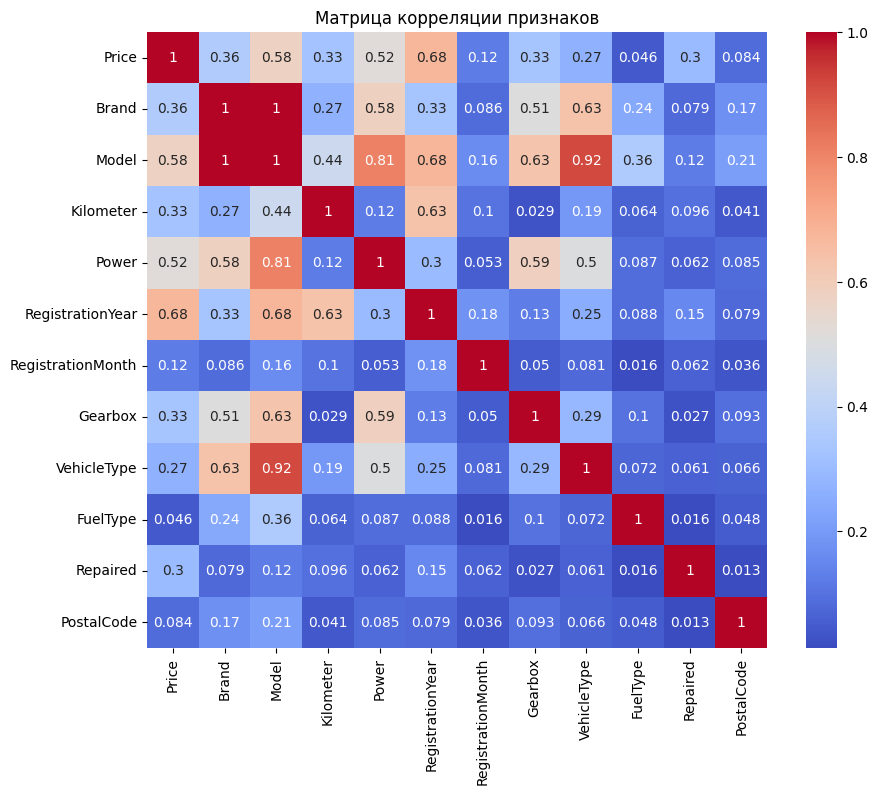

In [72]:
corr_matrix = phik_matrix(df, interval_cols=num_cols)
plt.figure(figsize=(10,8))
plt.title('Матрица корреляции признаков')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

В общем, никаких сюрпризов:
- цена хорошо коррелирует с годом регистрации, мощностью моделью. Хуже с типом кузова, фактом ремонта, коробкой передач, брендом и пробегом. И практически никак с пмж продавца и типом топлива
- бренд хорошо коррелирует с маркой (очевидно, учитывая что мы заполняли пустые значения исходя из бренда)
- модель и тип кузова - высокая корреляция (тоже все очевидно)
- неплохая корреляция коробки передач с моделью (чаще всего модель выпускают с конкретной коробкой)

В целом, признаки устраивают, но нужно избавляться либо от модели, либо от бренда - у них стопроцентная корреляция

Объединим их в один параметр brand_model

In [73]:
df.head()

,Price,Brand,Model,Kilometer,Power,RegistrationYear,RegistrationMonth,Gearbox,VehicleType,FuelType,Repaired,PostalCode
1,18300,audi,a4,125000,190,2011,5,manual,coupe,petrol,yes,66954
2,9800,jeep,grand,125000,163,2004,8,auto,suv,petrol,no,90480
3,1500,volkswagen,golf,150000,75,2001,6,manual,small,petrol,no,91074
4,3600,skoda,fabia,90000,69,2008,7,manual,small,petrol,no,60437
5,650,bmw,3er,150000,102,1995,10,manual,sedan,petrol,yes,33775


In [74]:
df['brand_model'] = df.Brand.astype(str) + '_' + df.Model.astype(str)

In [75]:
df.head()

,Price,Brand,Model,Kilometer,Power,RegistrationYear,RegistrationMonth,Gearbox,VehicleType,FuelType,Repaired,PostalCode,brand_model
1,18300,audi,a4,125000,190,2011,5,manual,coupe,petrol,yes,66954,audi_a4
2,9800,jeep,grand,125000,163,2004,8,auto,suv,petrol,no,90480,jeep_grand
3,1500,volkswagen,golf,150000,75,2001,6,manual,small,petrol,no,91074,volkswagen_golf
4,3600,skoda,fabia,90000,69,2008,7,manual,small,petrol,no,60437,skoda_fabia
5,650,bmw,3er,150000,102,1995,10,manual,sedan,petrol,yes,33775,bmw_3er


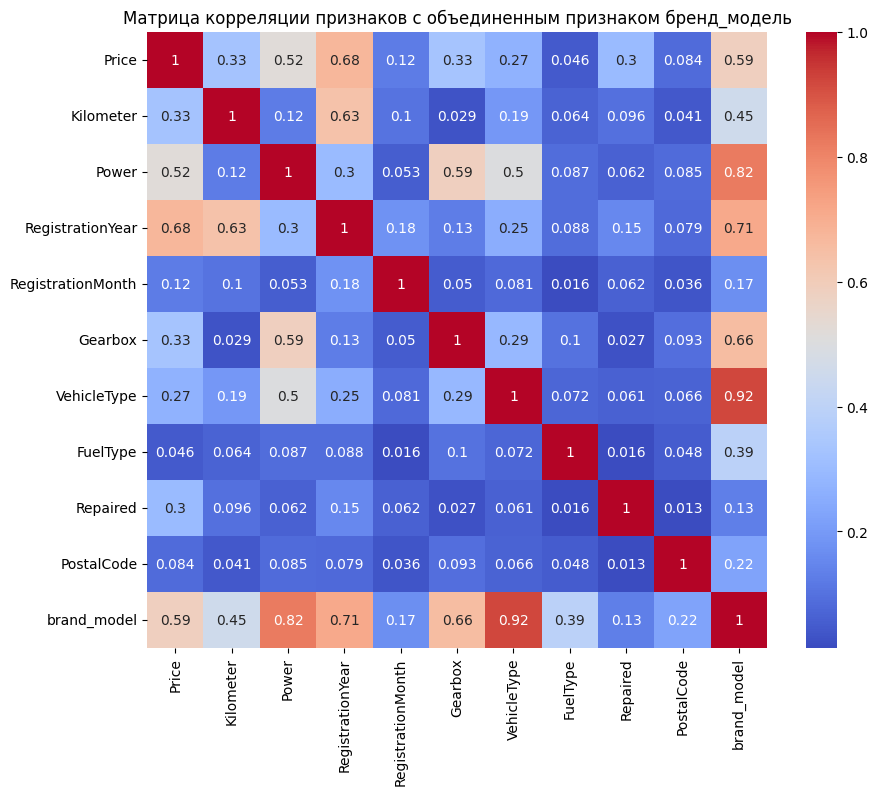

In [76]:
corr_matrix = phik_matrix(df.drop(['Brand', 'Model'], axis=1), interval_cols=num_cols)
plt.figure(figsize=(10,8))
plt.title('Матрица корреляции признаков с объединенным признаком бренд_модель')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [77]:
# хоршее решение, перезапишем датафрейм

df.drop(['Brand', 'Model'], axis=1, inplace=True)

In [78]:
df.head()

,Price,Kilometer,Power,RegistrationYear,RegistrationMonth,Gearbox,VehicleType,FuelType,Repaired,PostalCode,brand_model
1,18300,125000,190,2011,5,manual,coupe,petrol,yes,66954,audi_a4
2,9800,125000,163,2004,8,auto,suv,petrol,no,90480,jeep_grand
3,1500,150000,75,2001,6,manual,small,petrol,no,91074,volkswagen_golf
4,3600,90000,69,2008,7,manual,small,petrol,no,60437,skoda_fabia
5,650,150000,102,1995,10,manual,sedan,petrol,yes,33775,bmw_3er


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Удалена часть лишних признаков.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

1. Все ли признаки важны для ценообразования? Посмотри ещё раз внимательно на результаты анализа корреляции.
    
2. Так как мы удалили часть лишних признаков, у нас могут появиться новые явные дубликаты: чем меньше признаков остаётся, тем выше шанс, что значения остальных признаков будут пересекаться. При этом ценности для модели такие наблюдения уже не принесут, поэтому стоит проверить дубликаты также в финальной версии таблицы.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

1) Согласен, можно убрать и Почтовый индекс, и тип топлива по причине их низкой корреляции с ценой. Хотя психологически тяжело отказаться от них - как будто бы от них немного должна зависеть цена (где находится продавец и дизель у него/электричка/ или бензин)

2) проверку на дубликаты добавил ниже

</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> А что насчёт месяца регистрации? Влияет ли как-то месяц __постановки автомобиля на учёт__ на его цену - важно ли будущему автовладельцу, что его автомобиль поставлен на учёт, скажем, в сентябре, а не в июне?

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Ладно, согласен) смущала хорошая корреляция. Убрал и эту фичу
</div>

In [79]:
df.drop(['PostalCode', 'FuelType', 'RegistrationMonth'], axis=1, inplace=True)

In [80]:
df.duplicated().sum()

50864

In [81]:
df.drop_duplicates(inplace=True)

#### 1.6 Финальные причесывания - имена колонок приведем в удобную форму

In [82]:
df.columns = df.columns.str.replace('(?<=[a-z])(?=[A-Z])', '_', regex=True).str.lower()
df.columns

Index(['price', 'kilometer', 'power', 'registration_year', 'gearbox',
       'vehicle_type', 'repaired', 'brand_model'],
      dtype='object')

​
## 2.  Обучение моделей


### 2.1 Разделим признаки

In [83]:
ohe_cols = ['repaired', 'gearbox']
ord_cols = [ 'kilometer', 'registration_year', 'vehicle_type', 'brand_model']
cat_cols = ohe_cols + ord_cols
num_cols = ['power']

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Для линейной модели технику `OrdinalEncoder()` использовать нельзя: таким образом вес признака с большим количеством уникальных значений будет выше веса призака с меньшим количество уникальны значений, и модель ошибочно будет интерпретировать этот признак как более важный, что не всегда будет правдой.
    
Для линейной модели категориальные признаки нужно кодировать техникой `OneHotEncoder()`. 
    
Для отработки замечания сделай, пожалуйста, две выборки: одну закодируй `OneHotEncoder`, чтобы мы могли также поработать с линейной моделью, для других моделей можно оставить `OrdinalEncoder`.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

принято, добавил!
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

### 2.2 Создадим пайплайны

In [84]:
ohe_pl = Pipeline(
    [
        ('ohe_imp', SimpleImputer(strategy='most_frequent', missing_values=np.nan)),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ]
)

ord_pl = Pipeline( 
    [
        ('ord_imp', SimpleImputer(strategy='most_frequent', missing_values=np.nan)),
        ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)),
        ('ord_imp_post', SimpleImputer(strategy='most_frequent', missing_values=np.nan))
    ]
)


In [85]:
ohe_pipe_lr = Pipeline(
    [
        (
            'ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
        )
    ]
)

In [86]:
# трансформатор колонок для линейной модели

col_transformer_lr = ColumnTransformer(
    [
        ('ohe', ohe_pipe_lr, cat_cols),
        ('num', StandardScaler(), num_cols)
    ],
    remainder='passthrough'
)

In [87]:
# трансформатор колонок для всех моделей, кроме линейной

col_transformer_other = ColumnTransformer(
    [
        ('ohe', ohe_pl, ohe_cols),
        ('ord', ord_pl, ord_cols),
        ('num', StandardScaler(), num_cols)
    ],
    remainder='passthrough'
)

In [88]:
final_pl_lr = Pipeline(
    [
        ('prep', col_transformer_lr),
        ('models', LinearRegression())
    ]
)

In [89]:
final_pl_other = Pipeline(
    [
        ('prep', col_transformer_other),
        ('models', DecisionTreeRegressor(random_state=42))
    ]
)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Здорово, что используешь сочетание `ColumnTransformer` и `Pipeline` для соединения разных инструментов в единый модельный объект и настраиваешь бесперебойную работу энкодера в случае появления в данных новых, неизвестных на момент обучения значений признаков - так твоё решение будет более гибким и масштабируемым. 

### 2.3 Разобьем данные на тренировочную и тестовую выборки

In [90]:
X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Сплитование выполнено.

#### 2.4 Подбор параметров и обучение моделей

Обучать будем:
- линейную регрессию
- CatBoostRegressor
- LGBMRegressor

- XGBRegressor
- DecisionTreeRegressor

In [91]:
params_lr = [
    {
        'models': [LinearRegression()],
        'prep__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

In [92]:
params_other = [
    {
        'models': [CatBoostRegressor(random_state=42, verbose=10), 
                   LGBMRegressor(random_state=42)],
        'models__learning_rate':  [0.1, 0.25], 
        'models__max_depth': [10, 12],
        'models__n_estimators': [200], 
        'prep__num': ['passthrough']
    },
    {
        'models': [XGBRegressor(random_state=42)],
        'models__learning_rate':  [0.1, 0.12],
        'models__max_depth': [10, 12],
        'models__n_estimators': [200],
        'prep__num': ['passthrough']
    },
    {
        'models': [DecisionTreeRegressor(random_state=42)],
        'models__max_depth': range(3, 5),
        'models__min_samples_split': range(3, 5),
        'models__min_samples_leaf': range(3, 5),
        'prep__num': ['passthrough']
    }
]

In [93]:
randomized_search_lr = RandomizedSearchCV(
    final_pl_lr, 
    params_lr, 
    cv=5,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

In [94]:
search_other = GridSearchCV(
    final_pl_other,
    param_grid=params_other,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error' # задаем отрицательное значение метрики в целях минимизации ошибки
)

In [95]:
randomized_search_lr.fit(X_train, y_train)

/Users/tony_builder/Library/Python/3.10/lib/python/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


/Users/tony_builder/Library/Python/3.10/lib/python/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/tony_builder/Library/Python/3.10/lib/python/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/tony_builder/Library/Python/3.10/lib/python/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/tony_builder/Library/Python/3.10/lib/python/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/tony_

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['repaired',
                                                                                'gearbox',
                                                                                'kilometer',
                                                                                'registration_year',
                                                                                'vehicle_type',
                                                                                'brand_model']),
                                                                              ('num',
                                                                               StandardScaler(),
                                                                               ['power'])])),
                                             ('models', LinearRegression())]),
                   n_jobs=-1,
                   param_distributions=[{'models': [LinearRegression()],
                                         'prep__num': [StandardScaler(),
                                                       MinMaxScaler(),
                                                       'passthrough']}],
                   random_state=42, scoring='neg_root_mean_squared_error')

In [96]:
search_other.fit(X_train, y_train)

0:	learn: 4364.9880100	total: 147ms	remaining: 29.3s
0:	learn: 4352.6097298	total: 139ms	remaining: 27.6s
0:	learn: 4358.2537045	total: 171ms	remaining: 34.1s
0:	learn: 4360.2799782	total: 191ms	remaining: 38s
0:	learn: 4361.1583114	total: 233ms	remaining: 46.5s
10:	learn: 2546.4013913	total: 1.05s	remaining: 18s
0:	learn: 4344.0474202	total: 307ms	remaining: 1m 1s
10:	learn: 2546.2412114	total: 1.13s	remaining: 19.4s
10:	learn: 2548.9356420	total: 1.19s	remaining: 20.5s
0:	learn: 4358.2202453	total: 282ms	remaining: 56s
10:	learn: 2550.8826192	total: 1.21s	remaining: 20.8s
0:	learn: 4349.5801699	total: 337ms	remaining: 1m 7s
10:	learn: 2545.8520322	total: 1.24s	remaining: 21.4s
20:	learn: 2057.7590299	total: 1.99s	remaining: 16.9s
20:	learn: 2049.9308776	total: 2.15s	remaining: 18.3s
20:	learn: 2059.1287043	total: 2.11s	remaining: 18s
20:	learn: 2063.9621699	total: 2.15s	remaining: 18.3s
10:	learn: 2482.2148050	total: 1.79s	remaining: 30.8s
30:	learn: 1887.0135230	total: 2.76s	remaini

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


GridSearchCV(estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('ohe_imp',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['repaired',
                                                                          'gearbox']),
                                                                        ('ord',
                                                                         Pipeline(steps=[('ord_imp',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ord',
                                                                                          Ordi...
                                                  random_state=42, ...)],
                          'models__learning_rate': [0.1, 0.12],
                          'models__max_depth': [10, 12],
                          'models__n_estimators': [200],
                          'prep__num': ['passthrough']},
                         {'models': [DecisionTreeRegressor(random_state=42)],
                          'models__max_depth': range(3, 5),
                          'models__min_samples_leaf': range(3, 5),
                          'models__min_samples_split': range(3, 5),
                          'prep__num': ['passthrough']}],
             scoring='neg_root_mean_squared_error')

In [97]:
randomized_search_lr.best_estimator_

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['repaired', 'gearbox',
                                                   'kilometer',
                                                   'registration_year',
                                                   'vehicle_type',
                                                   'brand_model']),
                                                 ('num', 'passthrough',
                                                  ['power'])])),
                ('models', LinearRegression())])

In [98]:
search_other.best_estimator_

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe_imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['repaired', 'gearbox']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord_imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unkno...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=10, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [99]:
np.abs(randomized_search_lr.best_score_)

2101.752029591527

In [100]:
np.abs(search_other.best_score_)

1621.2381899785848

Вывод: 
1) Итак, лучшей моделью оказалась модель экстремального градиентного бустинга XGBoost (от англ. extreme gradient boosting)

2) Лучшее значение метрики (корень из средней квадратной ошибки) - 1621 евро. Довольно много, но меньше заданной по условию задачи (2500)

3) Линейная модель показала слишком большое значение ошибки - 2101 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Найдена лучшая модель.

​
## 3.  Анализ моделей


Выведем информацию об обучении моделей "под капотом" gridSearch  на кросс-валидации

In [101]:
cv_res_df = pd.DataFrame(search_other.cv_results_)\
            [['param_models', 'mean_test_score', 'mean_fit_time', 'mean_score_time']]

cv_res_df.mean_test_score = cv_res_df.mean_test_score * -1 

Неудобно, поэтому вытащим имена моделей и посчитаем средние показатели по модели

In [102]:
import re

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b>
Все библиотеки стоит импортировать в начале проекта - таким образом получатель твоего отчёта сможет узнать о проблемах с его окружением сразу перед работой с проектом, а не посреди или в конце проекта.

In [103]:
cv_res_df['model_name']= cv_res_df.param_models.astype(str).apply(lambda x: re.search('[A-Z][A-Za-z]*', x).group())

In [104]:
cv_res_df.groupby('model_name').agg({'mean_test_score': 'mean',
                                       'mean_fit_time': 'mean',
                                       'mean_score_time': 'mean'})\
        .sort_values(['mean_test_score', 'mean_fit_time', 'mean_score_time'], ascending=False)

,mean_test_score,mean_fit_time,mean_score_time
model_name,,,
DecisionTreeRegressor,2701.155611,1.213909,0.170822
LGBMRegressor,1654.180507,12.947477,0.348558
CatBoostRegressor,1644.916905,21.321674,0.495511
XGBRegressor,1636.815209,10.462463,1.504381


Вывод:
1) Модель XGBRegressor показывает наилучшую метрику RMSE среди всех моделей и второе время по обучению 
2) Модель DecisionTreeRegressor показывает лучшее время обучения, но худшую метрику RMSE из всех моделей

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Хорошая сравнительная характеристика.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Как видишь, твоя метрика имеет отрицательное значение - это особеность работы `scoring` с метирками с приставкой `neg_` в начале: так как метрика `RMSE` применяется для задач регрессии, то она тем лучше, чем ниже - так как по умолчанию инструменты подбора гиперпараметров и поиска лучшей модели вроде `GridSearchCV` умеют только максимизировать метрику качества. Поэтому приставка `neg_` указывает пользователю, что оптимизатор настраивается так, чтобы оптимизируемая метрика минимизировалась, а не максимизировалась - таким образом задача максимизации будет решаться через задачу минимизации обратной функции.
    
Поэтому при выводе метрики на экран её стоит сделать положительной: взять по модулю, домножить на `-1` или просто указать `-` при выводе на экран, вроде `print(-a)`.
        
</div>

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Поправил!
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

## 4. Вывод по проекту

1) Данные изучены и обработаны:
    - удалены дубликаты
    - отфильтрованы неадекватные данные
    - устранены пропуски
    - проведен feature engineering

2) Выполнен статистический и корреляционный анализ:
    - выявлены и устранены аномалии в данных
    - оценена корреляция в данных
    - объединены признаки Бренд и Модель (из-за высокой корреляции)

3) Обучено 4 модели регрессии: 
    - подгтовлен пайплайн
    - взяты модели градиентного бустинга
    - взяты модели линейной регрессии и дерева решений
    - на кроссвалидации подобрана <font color='green'> лучшая модель XGBRegressor с метрикой RMSE 1528 евро</font>

4) Проведен анализ скорости работы моделей:
    - <font color='red'> лучшую скорость показала модель Дерева решений (но у нее худшее значение целевой метрики) </font>
    - <font color='green'> самой быстрой моделью среди градиентного бустинга оказалась и самая точная - XGBRegressor </font>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Нет оценки лучшей модели на `test`.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Лучшая модель на тестовых данных - XGBRegressor со временем работы около 2 секунд
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b>
Очень важно также проверить лучшую модель на адекватность, сравнив качество её предсказаний с качеством модели, которая предсказывала бы константу - вдруг окажется, что не было бы большого смысла заниматься созданием новых признаков, тюнингом и кросс-валидацией моделей, если можно было бы просто предсказывать среднее значение тренировочной выборки? 
    
В качестве константной модели можно использовать `DummyRegressor` (https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html) -  эта модель как раз создана для генерирования константных предсказаний.
    
Важно, чтобы результат тестирования нашей модели на тествой выборке был лучше, чем результат константной модели - в противном случае наша модель является бесполезной, так как все наши усилия над проектом не принесли результата, а можель, просто предсказывющая среднее на `train`, делает нашу работу лучше.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Добавил ниже)
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> Может, не сохранилось? В проекте нет этой оценки:)

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

хм, похоже на то. повторно загрузил!
</div>

In [105]:
print(f'Метрика RMSE на тестовой выборке лучшей модели: {root_mean_squared_error(y_test, search_other.best_estimator_.predict(X_test))}')

Метрика RMSE на тестовой выборке лучшей модели: 1611.3916947057498


Модель на тестовых данных показывает себя чуть лучше - метрика 1611 евро против 1621 на тренировочной выборке

In [106]:
dummy_model = DummyRegressor()

X_train_dummy = col_transformer_other.fit_transform(X_train, y_train)
X_test_dummy = col_transformer_other.transform(X_test)

dummy_model.fit(X_train_dummy, y_train)
dummy_model_preds = dummy_model.predict(X_test_dummy)

      
print(f'Метрика RMSE на тестовой выборке на dummy-модели:', root_mean_squared_error(y_test, 
    dummy_model_preds))      

Метрика RMSE на тестовой выборке на dummy-модели: 4719.83989629946


<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту.

Антон, проект получился на довольно хорошем уровне - отличная работа над проектом, молодец!

Мне нравится твой аналитический подход к выполнению проекта, ты соблюдаешь структуру работы, выполняешь её последовательно - это очень хорошо! Шаги проекта выполнены по порядку согласно плану проекта, нет смысловых и структурных ям. Важно, что не забываешь про выводы.
    
Отмечу отличную предобработку данных - были найдены и корректно обработаны почти все аномалии и пропуски, также выполнено кодирование категориальных переменных и масштабирование непрерывных.

Работа с моделями также выполнена отлично: исследовано несколько алгоритмов, проведён подбор гиперпараметров с помощью `RandomizedSearchCV`, выполнена промежуточная оценка моделей на кросс-валидации - молодец! Здорово, что используешь сочетание `ColumnTransformer` и `Pipeline` для соединения разных инструментов в единый модельный объект и настраиваешь бесперебойную работу энкодера в случае появления в данных новых, неизвестных на момент обучения значений признаков - так твоё решение будет более гибким и масштабируемым. 
    
Над проектом ещё стоит поработать - есть рекомендации по дополнению некоторых твоих шагов проекта. Такие рекомендации я отметил жёлтыми комментариями. Будет здорово, если ты учтёшь их - так проект станет структурно и содержательно более совершенным.
    
Также в работе есть критические замечания. К этим замечаниям я оставил пояснительные комментарии красного цвета, в которых перечислил возможные варианты дальнейших действий. Уверен, ты быстро с этим управишься:)
    
Если о том, что нужно сделать в рамках комментариев, будут возникать вопросы - оставь их, пожалуйста, в комментариях, и я отвечу на них во время следующего ревью.
    
Также буду рад ответить на любые твои вопросы по проекту или на какие-либо другие, если они у тебя имеются - оставь их в комментариях, и я постараюсь ответить:)
    
Жду твой проект на повторном ревью. До встречи:)